<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_HR_gr1/blob/Kiparenko-Nikolai-folder/Kiparenko%20Nikolai%5CINSPECTRUM_CLINIC_HR_RECSYS_GR1_AUTO_ML_12.06.2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install h2o

import h2o

from h2o.automl import H2OAutoML

!pip install autokeras
import autokeras as ak


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.4-py2.py3-none-any.whl size=177697886 sha256=66e31e032b917eaefc7287c2a5a931385f9f3f591eb881305833e2ca3addcad3
  Stored in directory: /root/.cache/pip/wheels/43/f2/b0/5bb4d702a0467e82d77c45088db3eef25114c26b0eec8e7f6a
Successfully built h2o
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.7/527.7 kB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 103.3 MB/s eta 0:00:00


In [2]:

# Загрузка датасетов из облака
import gdown

# Функции операционной системы
import os

# Работа с массивами данных
import numpy as np 

# Работа с таблицами
import pandas as pd

# автоматически парсит строку и сохранит ее в переменной datetime
import datetime

# Токенизатор для преобразование текстов в последовательности
from tensorflow.keras.preprocessing.text import Tokenizer

# Отрисовка графиков
import matplotlib.pyplot as plt
# Метрики для расчета ошибок
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [3]:
#Грузим файл
gdown.download('https://storage.yandexcloud.net/terratraineeship/23_InspectrumClinic_HR/datasets/%D0%94%D0%B0%D1%82%D0%B0%D0%A1%D0%B5%D1%82%20%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0%20%D1%80%D0%B5%D0%B7%D1%8E%D0%BC%D0%B5%20581%20%D1%80%D0%B5%D0%B7%D1%8E%D0%BC%D0%B5.xlsx','dataS.xlsx', quiet=True)   



'dataS.xlsx'

In [4]:
#Читаем файл
data = pd.read_excel (r'dataS.xlsx', index_col=0)
data.to_csv('data.csv')
data.head(5)

,Дата отклика,ФИО,"Пол, возраст",ЗП,Ищет работу на должность,Город,Занятость,График,Опыт (),Последнее/нынешное место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Подходит - да/нет
0,2023-02-23 00:00:00,Bessonova Mariya,Женщина,90 000 руб.,Growth Product Manager,"Индонезия, Не готова к переезду, не готова к к...","проектная работа, частичная занятость, полная ...",удаленная работа,Опыт работы —5 лет 10 месяцев,PT MYBALI APP GROUP,Менеджер по продукту,"Высшее, 2023, Нетоло́гия, 2014, Университет Ро...",23 февраля 2023 в 16:30,да
1,2023-01-11 00:00:00,Ефремова Екатерина Вячеславовна,Женщина,не указана,Growth Product Manager,"Москва, Готова к переезду, готова к командировкам",полная занятость,"удаленная работа, гибкий график, полный день",Опыт работы —11 лет 11 месяцев,Банк Открытие,Product owner трайб сбережения и инвестиции,"Высшее, 2022, GeekBrains, 2010, Московский худ...",8 февраля 2023 в 09:15,да
2,2023-02-27 00:00:00,Фролов Артур Михайлович,"Мужчина, 33 года, родился 23 августа 1989",150 000 руб.,Growth Product Manager,"Санкт-Петербург, Готов к переезду: Москва, гот...","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",Опыт работы —7 лет 2 месяца,DIKIY LLC,Директор по маркетингу и бренд-менеджер,"Высшее, 2013, Санкт-Петербургский государствен...",28 февраля 2023 в 09:41,да
3,2023-01-11 00:00:00,Хозаев Расул Шагаманович,"Мужчина, 32 года, родился 7 декабря 1990",не указана,Growth Product Manager,"Москва, м. Молодежная, Хочу переехать, готов к...","стажировка, частичная занятость, полная занятость","удаленная работа, гибкий график, полный день",Опыт работы —8 лет 10 месяцев,WeInvest,Product Manager (team leader),"Магистр, 2014, Московский государственный техн...",24 января 2023 в 12:07,да
4,2023-01-11 00:00:00,Шадрин Олег Михайлович,"Мужчина, 26 лет, родился 21 февраля 1996",150 000 руб.,Growth Product Manager,"Пермь, Хочу переехать, готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",Опыт работы —5 лет 9 месяцев,Индивидуальное предпринимательство / частная п...,Product/Project manager,"Высшее, 2021, Российская академия народного хо...",6 февраля 2023 в 11:18,да


### Вспомогательные функции

In [5]:
def convertDataSet(data): 
          #Если необходимо переименовать
          data.columns = ['Response_date', 'Full_name', 'Gender', 'Salary', 'Job', 'City', 'Employment', 'Schedule', 'Experience', 'Last_place', 'Position', 'Education', 'Update_resume', 'Suitable']
          #Разбираем Дату раждения
          Birth = data['Gender'].apply(lambda x: x.split(',')[2].strip() if len(x.split(','))>2 else '')
          data = data.assign(Birth=Birth)
          #Разбираем Возраст
          Age = data['Gender'].apply(lambda x: x.split(',')[1].strip() if len(x.split(','))>1 else '')
          data = data.assign(Age=Age)

          #Тип образования
          DegreeOfStudy = data['Education'].apply(lambda x: x.split(',')[0].strip() if len(x.split(','))>1 else '')
          data = data.assign(DegreeOfStudy=DegreeOfStudy)
          #Год окончания образования
          YearOfGraduation = data['Education'].apply(lambda x: x.split(',')[1].strip() if len(x.split(','))>1 else '')
          data = data.assign(YearOfGraduation=YearOfGraduation)

          #Формируем список месяцев
          month_name = {1: 'января', 2: 'февраля', 3: 'марта', 4: 'апреля', 5: 'мая', 6: 'июня',
                7: 'июля', 8: 'августа', 9: 'сентября', 10: 'октября', 11: 'ноября', 12: 'декабря'}


          for i, row in data.iterrows():
            #Gender
            row.Gender = row.Gender.split(',')[0].strip() 
            #Женщина = 0, Мужчина = 1
            row.Gender = row.Gender.replace('Женщина','0')
            row.Gender = row.Gender.replace('Мужчина','1')
            row.Gender = int(row.Gender)

            #Birth
            row.Birth = row.Birth.replace('родился','')
            row.Birth = row.Birth.replace('родилась','')
          
            #Age
            row.Age = row.Age.replace('года','')
            row.Age = row.Age.replace('год','')
            row.Age = row.Age.replace('лет','')
            row.Age = row.Age='' if 0 else row.Age

            try:
              row.Age = int(row.Age)
            except (IndexError, TypeError, ValueError):
              print(row.Age)
              row.Age = 0

            try:
                row.YearOfGraduation = int(row.YearOfGraduation)
            except (IndexError, TypeError, ValueError):
                print(row.YearOfGraduation)
                row.YearOfGraduation = 0

            #Salary
            row.Salary = row.Salary.replace(' ','') 
            row.Salary = str(float(row.Salary.replace('KGS',''))*0.89)      if row.Salary.find('KGS') != -1 else row.Salary
            row.Salary = str(float(row.Salary.replace('KZT',''))*0.18)      if row.Salary.find('KZT') != -1 else row.Salary
            row.Salary = str(float(row.Salary.replace('USD',''))*78.00)     if row.Salary.find('USD') != -1 else row.Salary
            row.Salary = str(float(row.Salary.replace('EUR',''))*85.00)     if row.Salary.find('EUR') != -1 else row.Salary
            row.Salary = row.Salary.replace('руб.','')
            row.Salary = row.Salary.replace('руб','')
            row.Salary = row.Salary.replace('неуказана','0')
            row.Salary = int(float(row.Salary)) 

            #Experience
            row.Experience = row.Experience.replace('Опыт работы —','')
            row.Experience = row.Experience.replace('Опыт работы','')
            row.Experience = row.Experience.replace('года',';')
            row.Experience = row.Experience.replace('лет',';')
            row.Experience = row.Experience.replace('годов',';')
            row.Experience = row.Experience.replace('год',';')
            row.Experience = row.Experience.replace('года',';')
            row.Experience = row.Experience.replace('месяцев','')
            row.Experience = row.Experience.replace('месяца','')
            row.Experience = row.Experience.replace('месяц','')
            row.Experience = row.Experience.replace('нет','0')
            #Приводим к месяцам, если были года умножаем на 12 иначе берем как есть 
            row.Experience = (int(row.Experience.split(';')[0].strip()) * 12 + (int(row.Experience.split(';')[1].strip())) if row.Experience.split(';')[1].strip() != '' else int(row.Experience.split(';')[0].strip()) * 12) if len(row.Experience.split(';')) >1 else int(row.Experience.strip()) 

            #Schedule
            #вахтовый метод = 0, удаленная работа = 1, гибкий график = 2, полный день = 3, сменный график = 4
            row.Schedule = row.Schedule.replace('вахтовый метод','0')
            row.Schedule = row.Schedule.replace('удаленная работа','1')
            row.Schedule = row.Schedule.replace('гибкий график','2')
            row.Schedule = row.Schedule.replace('полный день','3')
            row.Schedule = row.Schedule.replace('сменный график','4')

            #Employment
            #проектная работа = 0, неполный рабочий день = 1, полный рабочий день = 2, полная занятость = 3, частичная занятость = 4, стажировка = 5, волонтерство = 6
            row.Employment = row.Employment.replace('проектная работа','0')
            row.Employment = row.Employment.replace('неполный рабочий день','1')
            row.Employment = row.Employment.replace('полный рабочий день','2')
            row.Employment = row.Employment.replace('полная занятость','3')
            row.Employment = row.Employment.replace('частичная занятость','4')
            row.Employment = row.Employment.replace('стажировка','5')
            row.Employment = row.Employment.replace('волонтерство','6')

            #Birth
            for i in month_name:
              row.Birth         = row.Birth.replace(month_name[i],'-'+str(i)+'-')
          
            row.Birth         = row.Birth.replace('родился','')
            row.Birth         = row.Birth.replace('родилась','')
            row.Birth         = row.Birth.replace(' -','-')
            row.Birth         = row.Birth.replace('- ','-')
            row.Birth         = row.Birth+' 00:00:00'

            row.Birth = '1-1-1' +row.Birth if row.Birth == ' 00:00:00' else row.Birth
            day = int(row.Birth.split('-')[0].strip()) 
            month = int(row.Birth.split('-')[1].strip()) 
            year = row.Birth.split('-')[2].strip() 
            time = year.split(' ')[1].strip()
            year = int(year.split(' ')[0].strip())

            row.Birth = int(datetime.datetime(year,month,day).utcnow().timestamp())

            #Update_resume 
            for i in month_name:
              row.Update_resume = row.Update_resume.replace(month_name[i],'-'+str(i)+'-')
          
            row.Update_resume = row.Update_resume.replace('в','')
            row.Update_resume = row.Update_resume.replace(' -','-')
            row.Update_resume = row.Update_resume.replace('- ','-')
            row.Update_resume = row.Update_resume+':00'

            day = int(row.Update_resume.split('-')[0].strip()) 
            month = int(row.Update_resume.split('-')[1].strip()) 
            year = row.Update_resume.split('-')[2].strip() 
            year = year.replace('  ',';')
            year = year.replace(' ',';')
            
            time = year.split(';')[1].strip()
            year = int(year.split(';')[0].strip())
            hour = int(time.split(':')[0].strip())
            minute = int(time.split(':')[1].strip())

            row.Update_resume = int(datetime.datetime(year,month,day,hour,minute,0).utcnow().timestamp())

            #Response_date
            row.Response_date = int(datetime.datetime.utcnow().timestamp())

          #Переведем в бинарные значения

          #проектная работа = 0, неполный рабочий день = 1, полный рабочий день = 2, полная занятость = 3, частичная занятость = 4, стажировка = 5, волонтерство = 6
          Employment_0 = data['Employment'].apply(lambda x: 1 if x.find('0') else 0)
          Employment_1 = data['Employment'].apply(lambda x: 1 if x.find('1') else 0)
          Employment_2 = data['Employment'].apply(lambda x: 1 if x.find('2') else 0)
          Employment_3 = data['Employment'].apply(lambda x: 1 if x.find('3') else 0)
          Employment_4 = data['Employment'].apply(lambda x: 1 if x.find('4') else 0)
          Employment_5 = data['Employment'].apply(lambda x: 1 if x.find('5') else 0)
          Employment_6 = data['Employment'].apply(lambda x: 1 if x.find('6') else 0)

          data = data.assign(Employment_0=Employment_0,
                              Employment_1=Employment_1,
                              Employment_2=Employment_2,
                              Employment_3=Employment_3,
                              Employment_4=Employment_4,
                              Employment_5=Employment_5,
                              Employment_6=Employment_6)

          #вахтовый метод = 0, удаленная работа = 1, гибкий график = 2, полный день = 3, сменный график = 4
          Schedule_0 = data['Schedule'].apply(lambda x: 1 if x.find('0') else 0)
          Schedule_1 = data['Schedule'].apply(lambda x: 1 if x.find('1') else 0)
          Schedule_2 = data['Schedule'].apply(lambda x: 1 if x.find('2') else 0)
          Schedule_3 = data['Schedule'].apply(lambda x: 1 if x.find('3') else 0)
          Schedule_4 = data['Schedule'].apply(lambda x: 1 if x.find('4') else 0)

          data = data.assign(Schedule_0=Schedule_0,
                              Schedule_1=Schedule_1,
                              Schedule_2=Schedule_2,
                              Schedule_3=Schedule_3,
                              Schedule_4=Schedule_4)

          data = data.drop(columns=['Schedule', 'Employment'])


          #City
          tokenizer = Tokenizer(num_words=30, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
          tokenizer.fit_on_texts(data.City) #"скармливаем" наши тексты, т.е даём в обработку методу, который соберет словарь частотности
          City_Indexes = tokenizer.texts_to_sequences(data.City)
          data = data.assign(City=City_Indexes)

          #Full_name
          tokenizer = Tokenizer(num_words=100, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
          tokenizer.fit_on_texts(data.Full_name)

          Full_name_Indexes = tokenizer.texts_to_sequences(data.Full_name) 
          data = data.assign(Full_name=Full_name_Indexes)

          #Education
          tokenizer = Tokenizer(num_words=200, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
          tokenizer.fit_on_texts(data.Education) #"скармливаем" наши тексты, т.е даём в обработку методу, который соберет словарь частотности

          Education_Indexes = tokenizer.texts_to_sequences(data.Education) 
          data = data.assign(Education=Education_Indexes)

          #DegreeOfStudy
          tokenizer = Tokenizer(num_words=20, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
          tokenizer.fit_on_texts(data.DegreeOfStudy) #"скармливаем" наши тексты, т.е даём в обработку методу, который соберет словарь частотности

          DegreeOfStudy_Indexes = tokenizer.texts_to_sequences(data.DegreeOfStudy) 
          data = data.assign(DegreeOfStudy=DegreeOfStudy_Indexes)

          #Job
          tokenizer = Tokenizer(num_words=150, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
          tokenizer.fit_on_texts(data.Job) #"скармливаем" наши тексты, т.е даём в обработку методу, который соберет словарь частотности

          Job_Indexes = tokenizer.texts_to_sequences(data.Job) 
          data = data.assign(Job=Job_Indexes)


          #Last_place
          tokenizer = Tokenizer(num_words=150, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
          tokenizer.fit_on_texts(data.Last_place) #"скармливаем" наши тексты, т.е даём в обработку методу, который соберет словарь частотности

          Last_place_Indexes = tokenizer.texts_to_sequences(data.Last_place) 
          data = data.assign(Last_place=Last_place_Indexes)

          #Position
          tokenizer = Tokenizer(num_words=150, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
          tokenizer.fit_on_texts(data.Position) #"скармливаем" наши тексты, т.е даём в обработку методу, который соберет словарь частотности

          Position_Indexes = tokenizer.texts_to_sequences(data.Position) 
          data = data.assign(Position=Position_Indexes)

          #Приведим все списки к однообразию
          data.Response_date = data.Response_date.astype('int')
          data.Gender = data.Gender.astype('int')
          data.Salary = data.Salary.astype('int')
          data.Update_resume = data.Update_resume.astype('int')
          data.Birth = data.Birth.astype('int')
          data.Age = data.Age.astype('int')
          data.YearOfGraduation = data.YearOfGraduation.astype('int')

          #Находим максимальную длину
          Full_nameMaxI = 0
          PositionMaxI = 0
          Last_placeMaxI = 0
          JobMaxI = 0
          EducationMaxI = 0
          CityMaxI = 0
          DegreeOfStudyMaxI = 0
          for i, row in data.iterrows():
              Full_nameMaxI   = max(Full_nameMaxI,len(row.Full_name))
              PositionMaxI    = max(PositionMaxI,len(row.Position))
              Last_placeMaxI  = max(Last_placeMaxI,len(row.Last_place))
              JobMaxI         = max(JobMaxI,len(row.Job))
              EducationMaxI   = max(EducationMaxI,len(row.Education))
              CityMaxI        = max(CityMaxI,len(row.City))
              DegreeOfStudyMaxI        = max(DegreeOfStudyMaxI,len(row.DegreeOfStudy))


          #обрабатываем данные list
          dataList = [] 
          for i, row in data.iterrows():
                row.Full_name     = np.array(row.Full_name+[0 for x in range(Full_nameMaxI-len(row.Full_name))])
                row.Position      = np.array(row.Position+[0 for x in range(PositionMaxI-len(row.Position))])
                row.Last_place    = np.array(row.Last_place+[0 for x in range(Last_placeMaxI-len(row.Last_place))])
                row.Job           = np.array(row.Job+[0 for x in range(JobMaxI-len(row.Job))])
                row.Education     = np.array(row.Education+[0 for x in range(EducationMaxI-len(row.Education))])
                row.City          = np.array(row.City+[0 for x in range(CityMaxI-len(row.City))])
                row.DegreeOfStudy          = np.array(row.DegreeOfStudy+[0 for x in range(DegreeOfStudyMaxI-len(row.DegreeOfStudy))])
                
                #row_data = np.hstack(row)
                row_data = np.hstack([
                                      row.Full_name,
                                      row.Position,
                                      row.Last_place,
                                      row.Job,
                                      row.Education,
                                      row.City,
                                      row.Response_date,
                                      row.Gender,
                                      row.Salary,
                                      row.Update_resume,
                                      row.Birth,
                                      row.Age,
                                      row.YearOfGraduation,
                                      row.DegreeOfStudy,
                                      row.Employment_0,
                                      row.Employment_1,
                                      row.Employment_2,
                                      row.Employment_3,
                                      row.Employment_4,
                                      row.Employment_5,
                                      row.Employment_6,
                                      row.Schedule_0,
                                      row.Schedule_1,
                                      row.Schedule_2,
                                      row.Schedule_3,
                                      row.Schedule_4]
                                    )
                
                dataList.append(row_data)

          dataset = np.array(dataList) #, dtype=np.float

          return data


In [6]:
def takeDataSet(data): 
          data = convertDataSet(data)

          #Находим максимальную длину
          Full_nameMaxI = 0
          PositionMaxI = 0
          Last_placeMaxI = 0
          JobMaxI = 0
          EducationMaxI = 0
          CityMaxI = 0
          DegreeOfStudyMaxI = 0
          for i, row in data.iterrows():
              Full_nameMaxI   = max(Full_nameMaxI,len(row.Full_name))
              PositionMaxI    = max(PositionMaxI,len(row.Position))
              Last_placeMaxI  = max(Last_placeMaxI,len(row.Last_place))
              JobMaxI         = max(JobMaxI,len(row.Job))
              EducationMaxI   = max(EducationMaxI,len(row.Education))
              CityMaxI        = max(CityMaxI,len(row.City))
              DegreeOfStudyMaxI        = max(DegreeOfStudyMaxI,len(row.DegreeOfStudy))


          #обрабатываем данные list
          dataList = [] 
          for i, row in data.iterrows():
                row.Full_name     = np.array(row.Full_name+[0 for x in range(Full_nameMaxI-len(row.Full_name))])
                row.Position      = np.array(row.Position+[0 for x in range(PositionMaxI-len(row.Position))])
                row.Last_place    = np.array(row.Last_place+[0 for x in range(Last_placeMaxI-len(row.Last_place))])
                row.Job           = np.array(row.Job+[0 for x in range(JobMaxI-len(row.Job))])
                row.Education     = np.array(row.Education+[0 for x in range(EducationMaxI-len(row.Education))])
                row.City          = np.array(row.City+[0 for x in range(CityMaxI-len(row.City))])
                row.DegreeOfStudy          = np.array(row.DegreeOfStudy+[0 for x in range(DegreeOfStudyMaxI-len(row.DegreeOfStudy))])
                
                #row_data = np.hstack(row)
                row_data = np.hstack([
                                      row.Full_name,
                                      row.Position,
                                      row.Last_place,
                                      row.Job,
                                      row.Education,
                                      row.City,
                                      row.Response_date,
                                      row.Gender,
                                      row.Salary,
                                      row.Update_resume,
                                      row.Birth,
                                      row.Age,
                                      row.YearOfGraduation,
                                      row.DegreeOfStudy,
                                      row.Employment_0,
                                      row.Employment_1,
                                      row.Employment_2,
                                      row.Employment_3,
                                      row.Employment_4,
                                      row.Employment_5,
                                      row.Employment_6,
                                      row.Schedule_0,
                                      row.Schedule_1,
                                      row.Schedule_2,
                                      row.Schedule_3,
                                      row.Schedule_4]
                                    )
                
                dataList.append(row_data)

          dataset = np.array(dataList)

          return dataset


##       **H2O**



In [7]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.19" 2023-04-18; OpenJDK Runtime Environment (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpx5e9a66y
  JVM stdout: /tmp/tmpx5e9a66y/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpx5e9a66y/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,1 month and 14 days
H2O_cluster_name:,H2O_from_python_unknownUser_otily8
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Без предварительной обработки

In [40]:
data = pd.read_excel (r'dataS.xlsx', index_col=0)
data.to_csv('data.csv')
df = h2o.import_file("data.csv",header =1)
df = df[:,1:]

df.describe ()


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:579
Cols:14

,Дата отклика,ФИО,"Пол, возраст",ЗП,Ищет работу на должность,Город,Занятость,График,Опыт (),Последнее/нынешное место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Подходит - да/нет
type,time,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum
mins,44603000.0,,,,,,,,,,,,,
mean,1672892871631.4878,,,,,,,,,,,,,
maxs,1679788800000.0,,,,,,,,,,,,,
sigma,69730799683.12486,,,,,,,,,,,,,
zeros,0,,,,,,,,,,,,,
missing,1,0,0,0,0,0,0,0,0,0,0,0,0,79
0,2023-02-23 00:00:00,Bessonova Mariya,Женщина,90 000 руб.,Growth Product Manager,"Индонезия, Не готова к переезду, не готова к командировкам","проектная работа, частичная занятость, полная занятость",удаленная работа,Опыт работы —5 лет 10 месяцев,PT MYBALI APP GROUP,Менеджер по продукту,"Высшее, 2023, Нетоло́гия, 2014, Университет Российской академии образования, Москва",23 февраля 2023 в 16:30,да
1,2023-01-11 00:00:00,Ефремова Екатерина Вячеславовна,Женщина,не указана,Growth Product Manager,"Москва, Готова к переезду, готова к командировкам",полная занятость,"удаленная работа, гибкий график, полный день",Опыт работы —11 лет 11 месяцев,Банк Открытие,Product owner трайб сбережения и инвестиции,"Высшее, 2022, GeekBrains, 2010, Московский художественно-промышленный институт, Москва",8 февраля 2023 в 09:15,да
2,2023-02-27 00:00:00,Фролов Артур Михайлович,"Мужчина, 33 года, родился 23 августа 1989",150 000 руб.,Growth Product Manager,"Санкт-Петербург, Готов к переезду: Москва, готов к командировкам","проектная работа, частичная занятость, полная занятость","удаленная работа, гибкий график, полный день",Опыт работы —7 лет 2 месяца,DIKIY LLC,Директор по маркетингу и бренд-менеджер,"Высшее, 2013, Санкт-Петербургский государственный университет промышленных технологий и дизайна, Санкт-Петербург",28 февраля 2023 в 09:41,да


In [41]:
train, test, valid = df.split_frame ( ratios = [ .6 , .20 ])

y = "Подходит - да/нет"
x_train= train.columns
x_train.remove(y)


In [11]:
aml_1 = H2OAutoML(max_models = 10, seed = 1)
hist = aml_1.train(x = x_train, y = y, training_frame = train)

AutoML progress: |
07:21:07.807: XGBoost_1_AutoML_2_20230612_72107 [XGBoost def_2] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for XGBoost model: XGBoost_1_AutoML_2_20230612_72107_cv_1.  Details: ERRR on field: _response_column: Response contains missing values (NAs) - not supported by XGBoost.


██████
07:21:28.135: XGBoost_2_AutoML_2_20230612_72107 [XGBoost def_1] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for XGBoost model: XGBoost_2_AutoML_2_20230612_72107_cv_1.  Details: ERRR on field: _response_column: Response contains missing values (NAs) - not supported by XGBoost.


███
07:21:33.620: XGBoost_3_AutoML_2_20230612_72107 [XGBoost def_3] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for XGBoost model: XGBoost_3_AutoML_2_20230612_72107_cv_1.  Details: ERRR on field: _response_column: Response contains missing values (NAs) - not supported by XGBoost.


███████

In [42]:
best_model_1 = aml_1.leader
lb = aml_1.leaderboard
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_5_AutoML_2_20230612_72107,0.673733,0.137097,0.986507,0.375,0.160693,0.0258223
GBM_grid_1_AutoML_2_20230612_72107_model_1,0.673077,0.143183,0.986595,0.375,0.163565,0.0267536
GBM_3_AutoML_2_20230612_72107,0.670673,0.137005,0.986374,0.375,0.161528,0.0260914
GBM_2_AutoML_2_20230612_72107,0.670673,0.131191,0.986374,0.375,0.153679,0.0236172
GBM_4_AutoML_2_20230612_72107,0.670673,0.133845,0.986374,0.375,0.155821,0.0242802
XRT_1_AutoML_2_20230612_72107,0.619537,0.426427,0.980942,0.5,0.163585,0.0267601
StackedEnsemble_BestOfFamily_1_AutoML_2_20230612_72107,0.60708,0.104274,0.983052,0.375,0.147199,0.0216676
DRF_1_AutoML_2_20230612_72107,0.515297,0.366427,0.970512,0.375,0.149271,0.0222818
GLM_1_AutoML_2_20230612_72107,0.497815,0.125451,0.973309,0.375,0.162786,0.0264992
StackedEnsemble_AllModels_1_AutoML_2_20230612_72107,0.495192,0.122715,0.97635,0.375,0.149443,0.0223332


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_5_AutoML_2_20230612_72107

,да,нет,Error,Rate
да,1.0,1.0,0.5,(1.0/2.0)
нет,0.0,97.0,0.0,(0.0/97.0)
Total,1.0,98.0,0.0101,(1.0/99.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

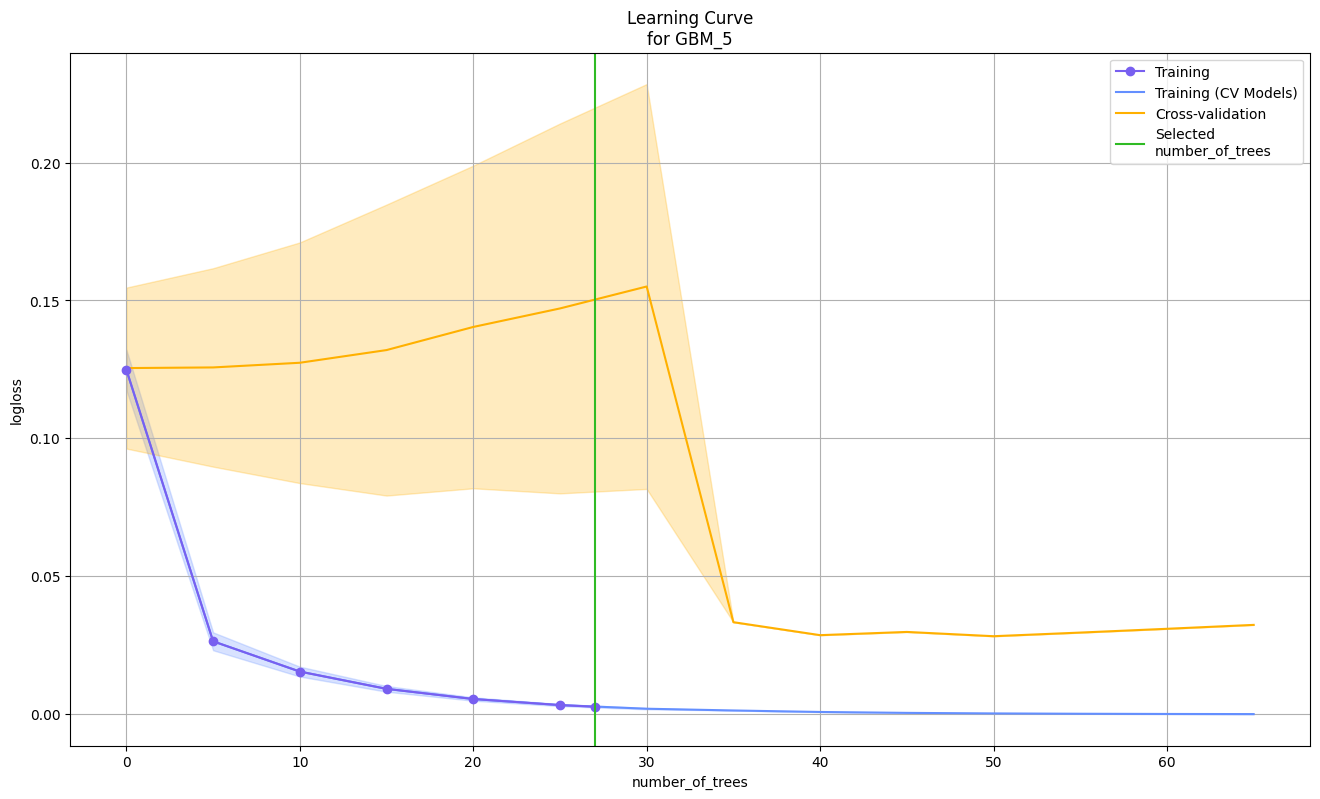

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

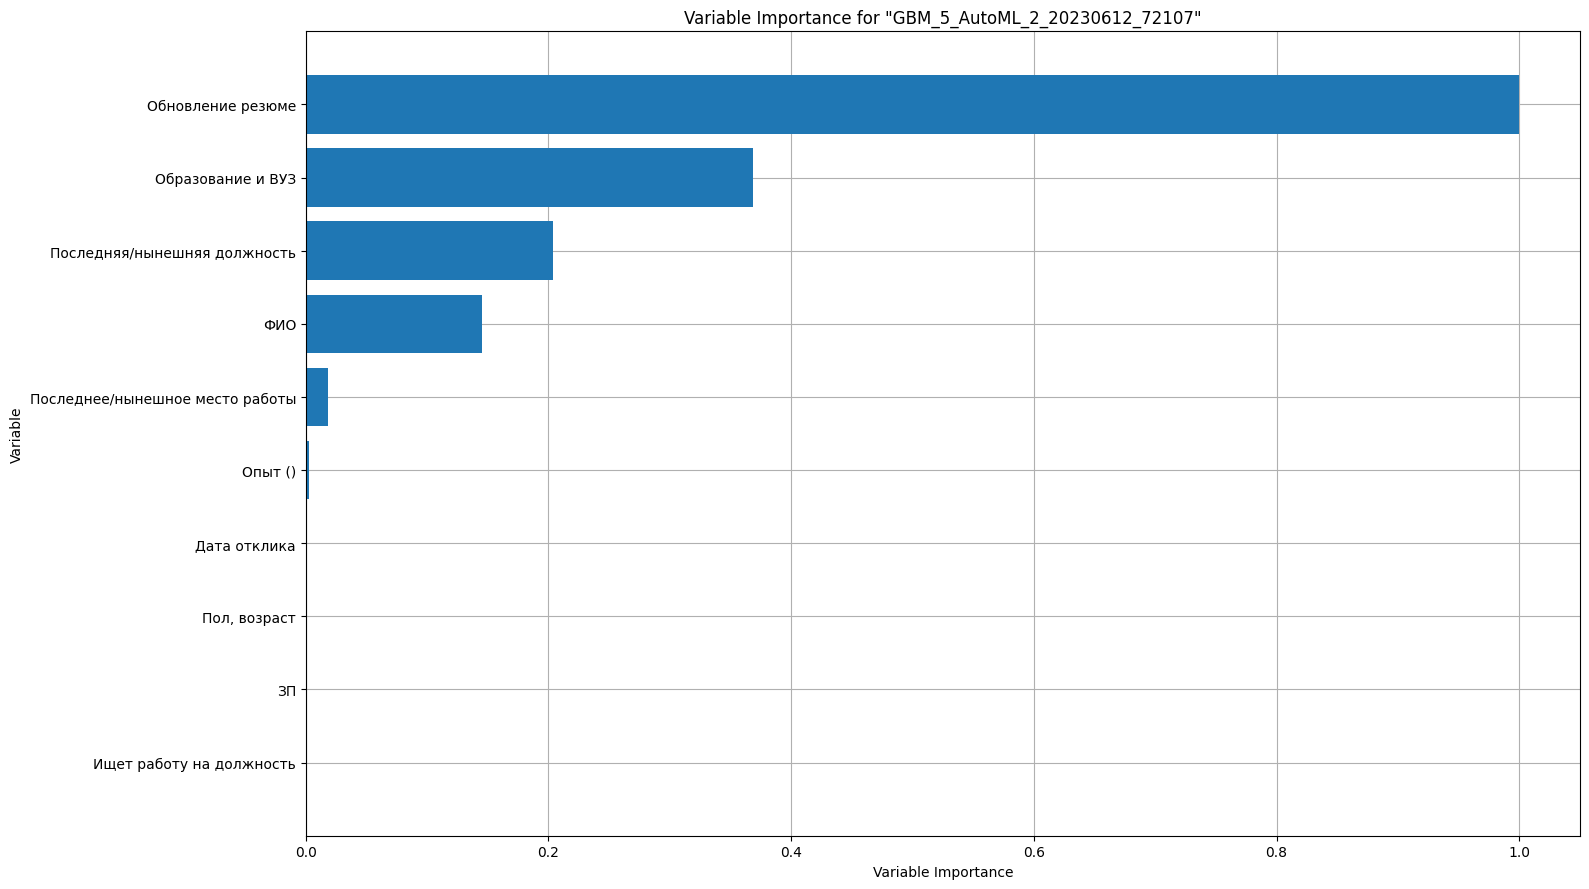

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

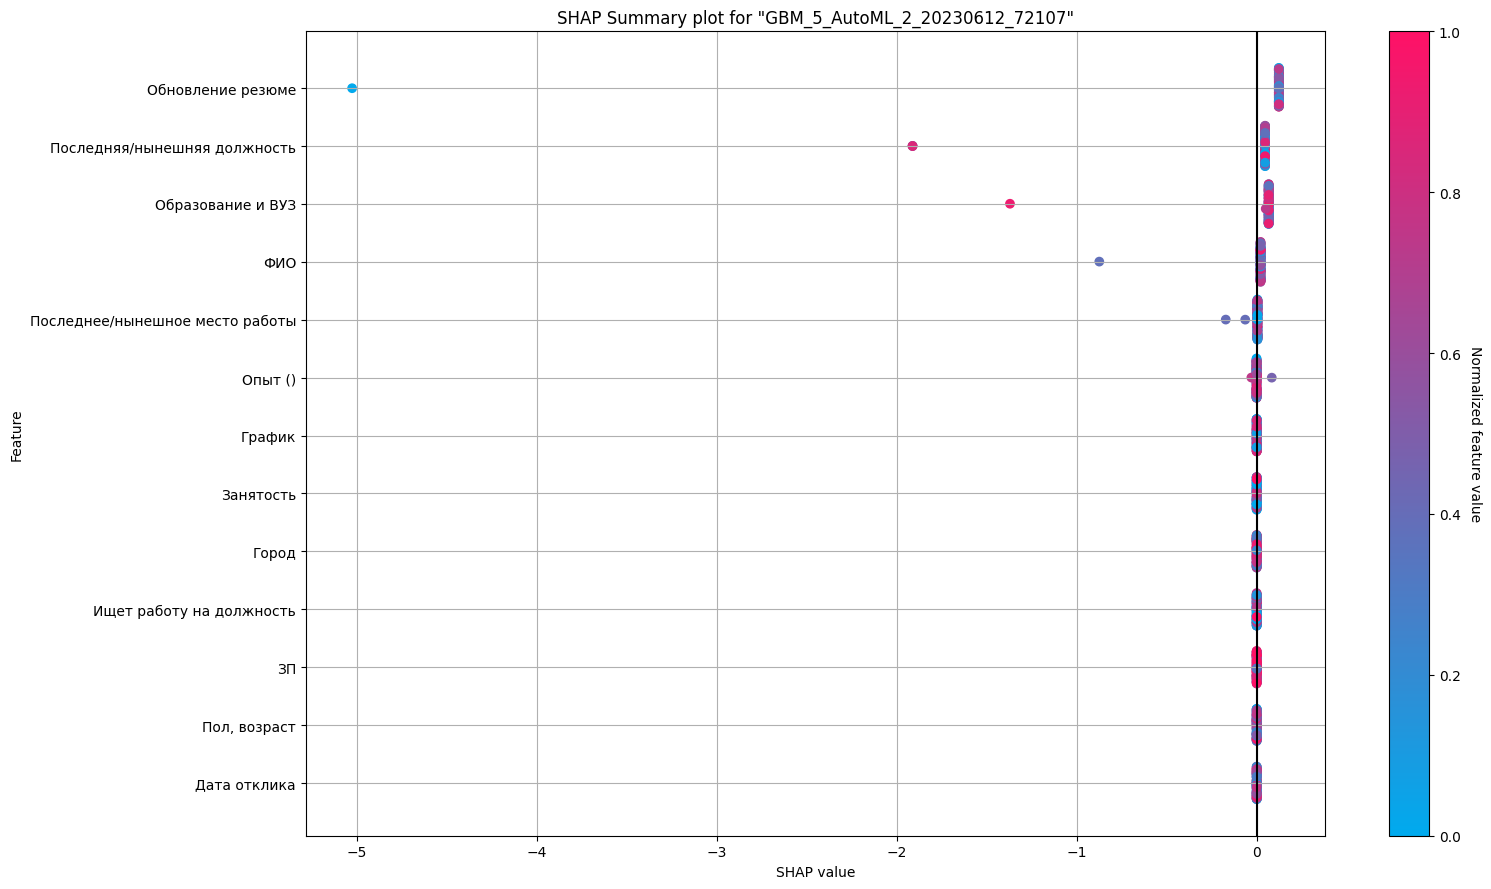

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

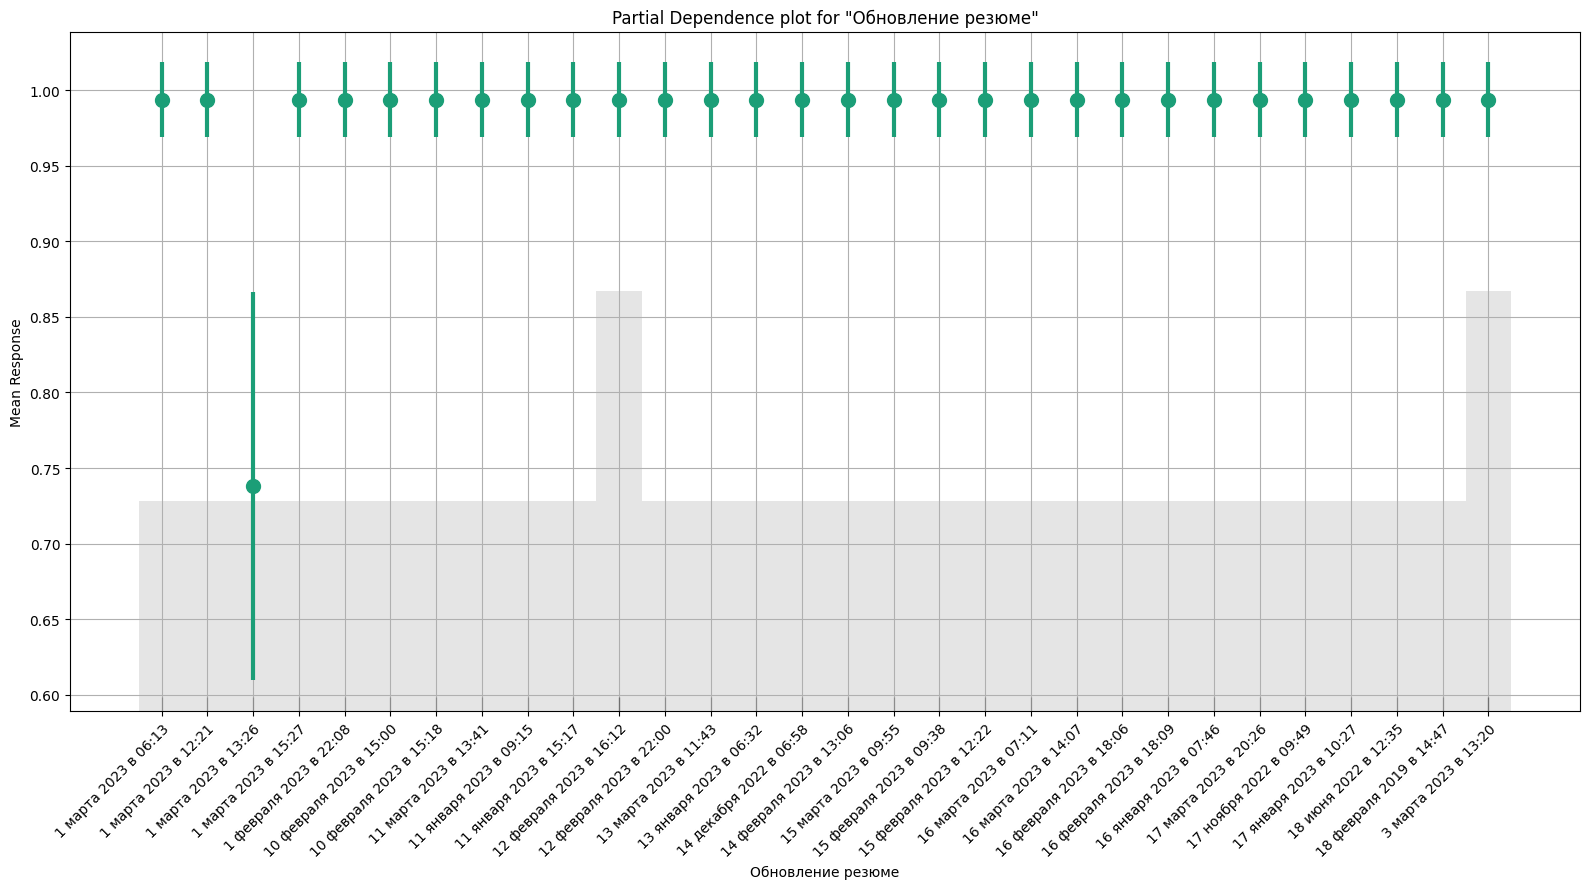

/usr/local/lib/python3.10/dist-packages/h2o/explanation/_explain.py:1287: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


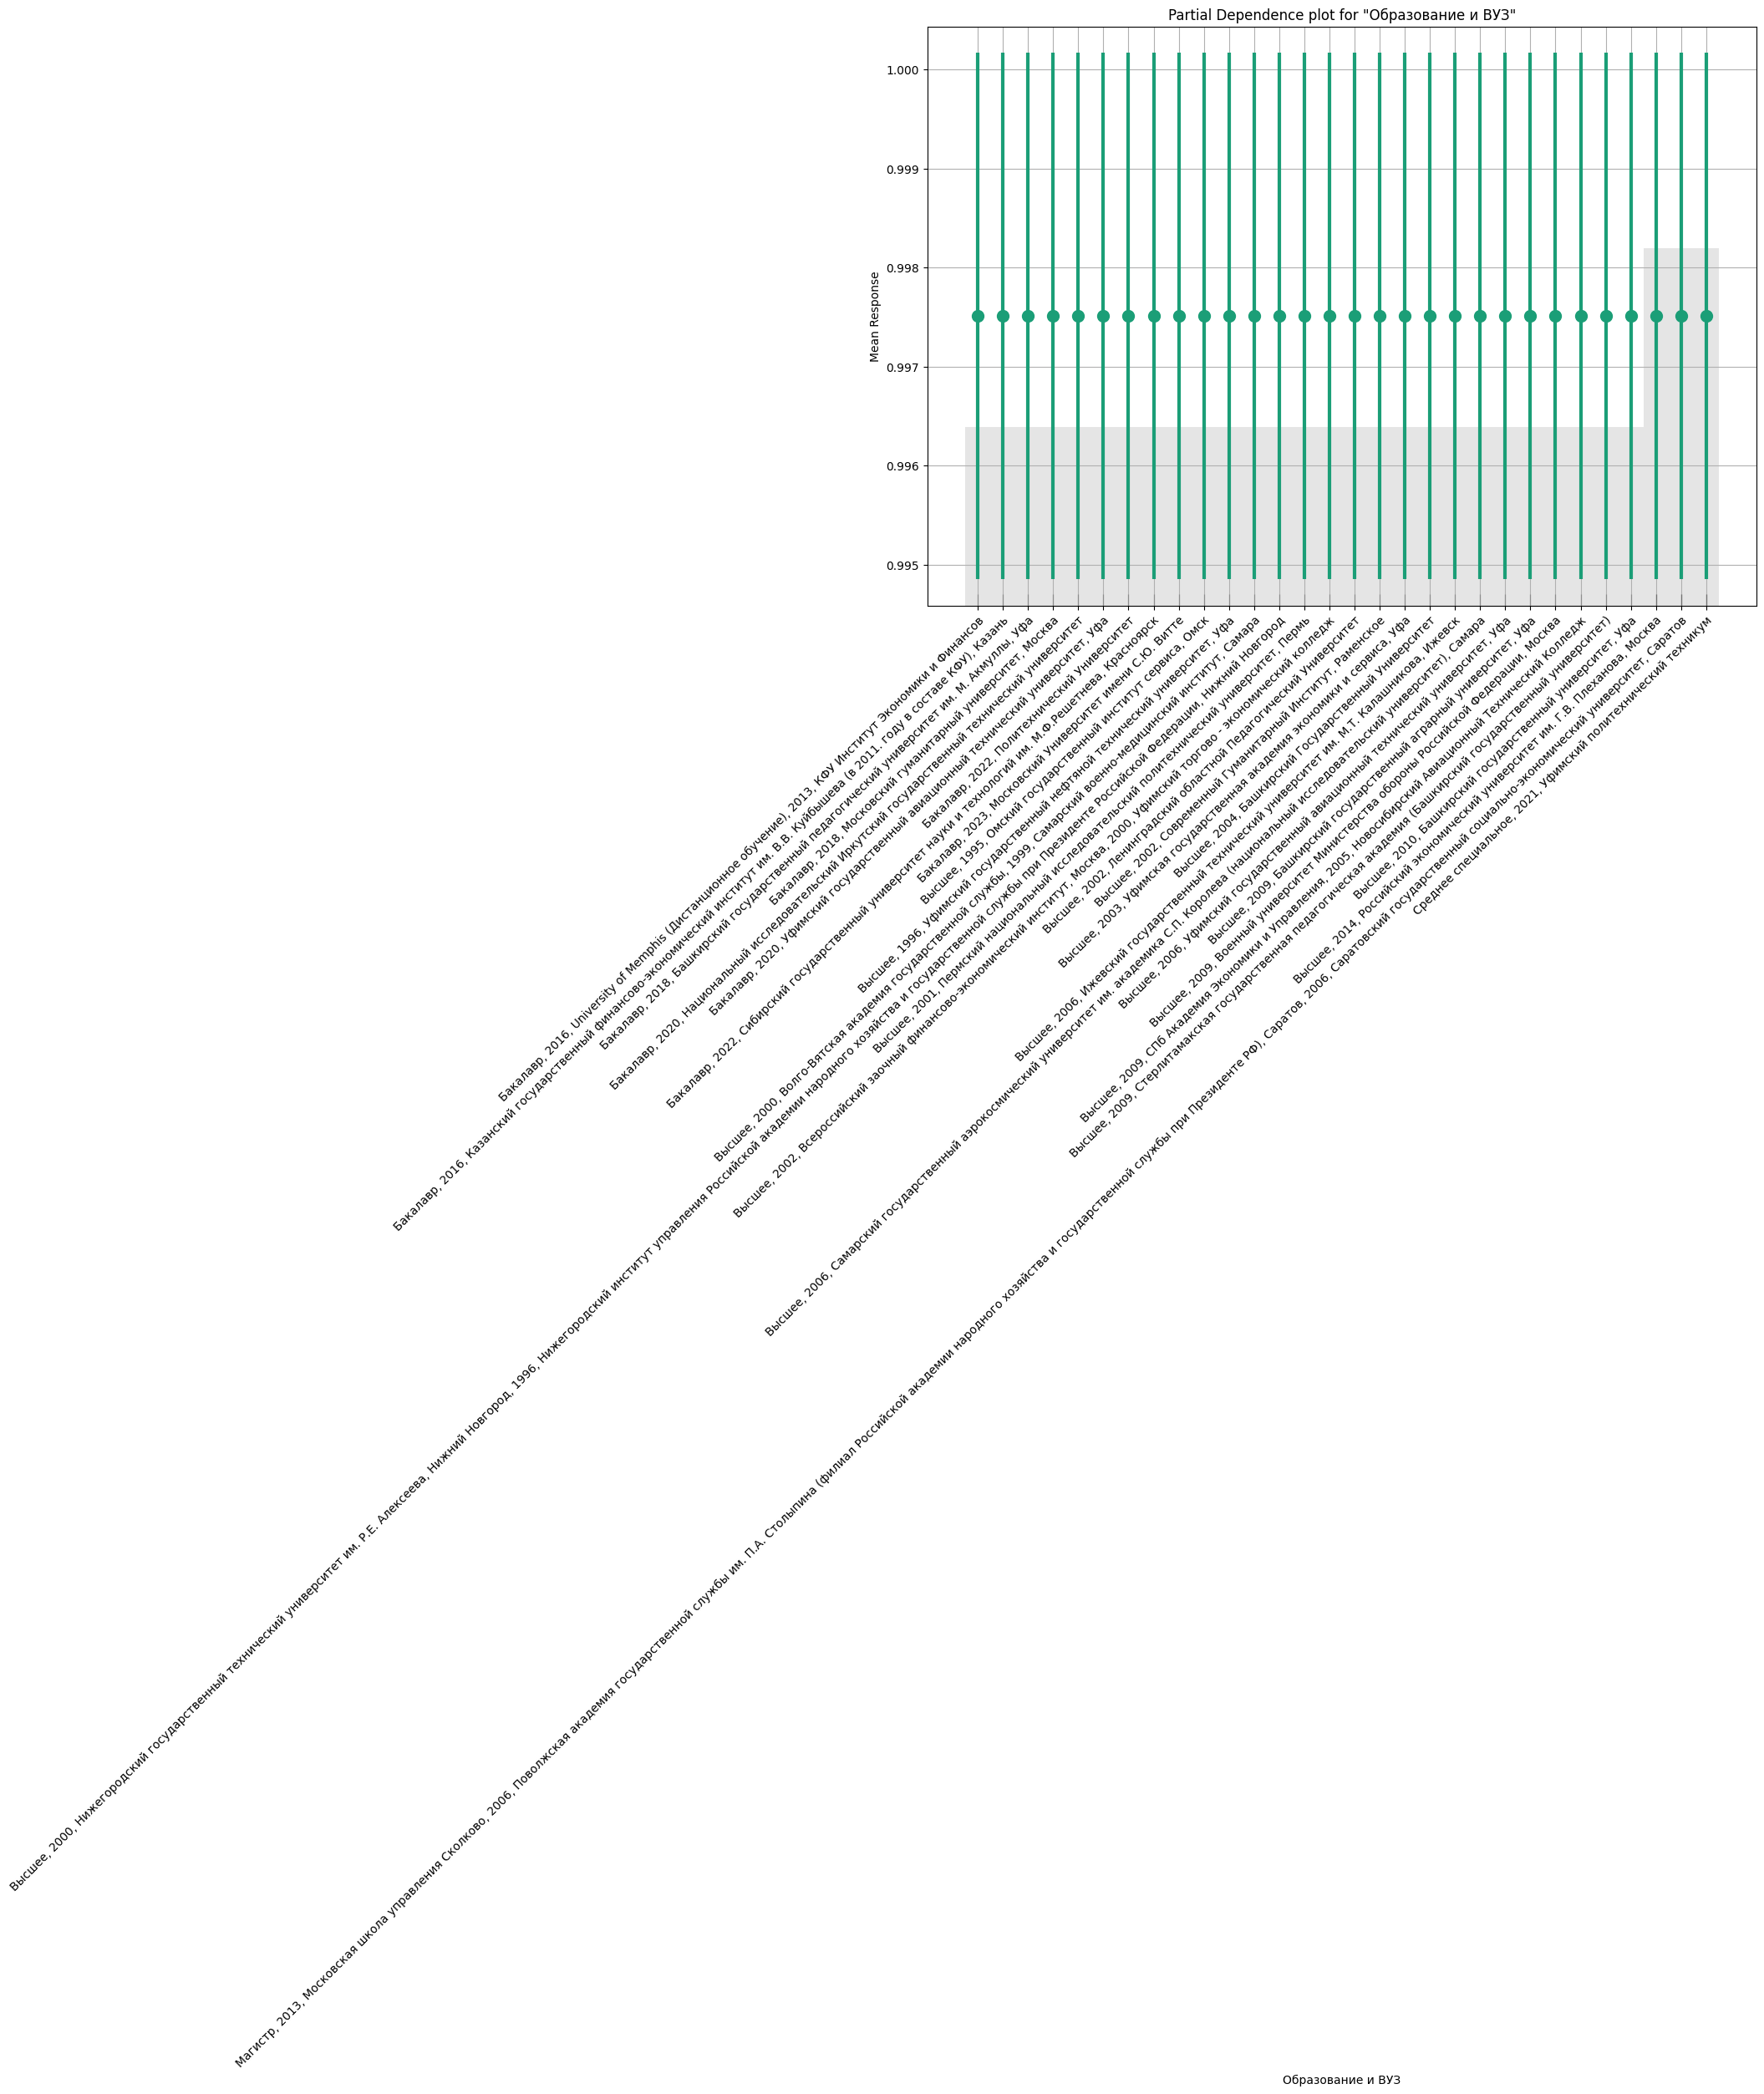

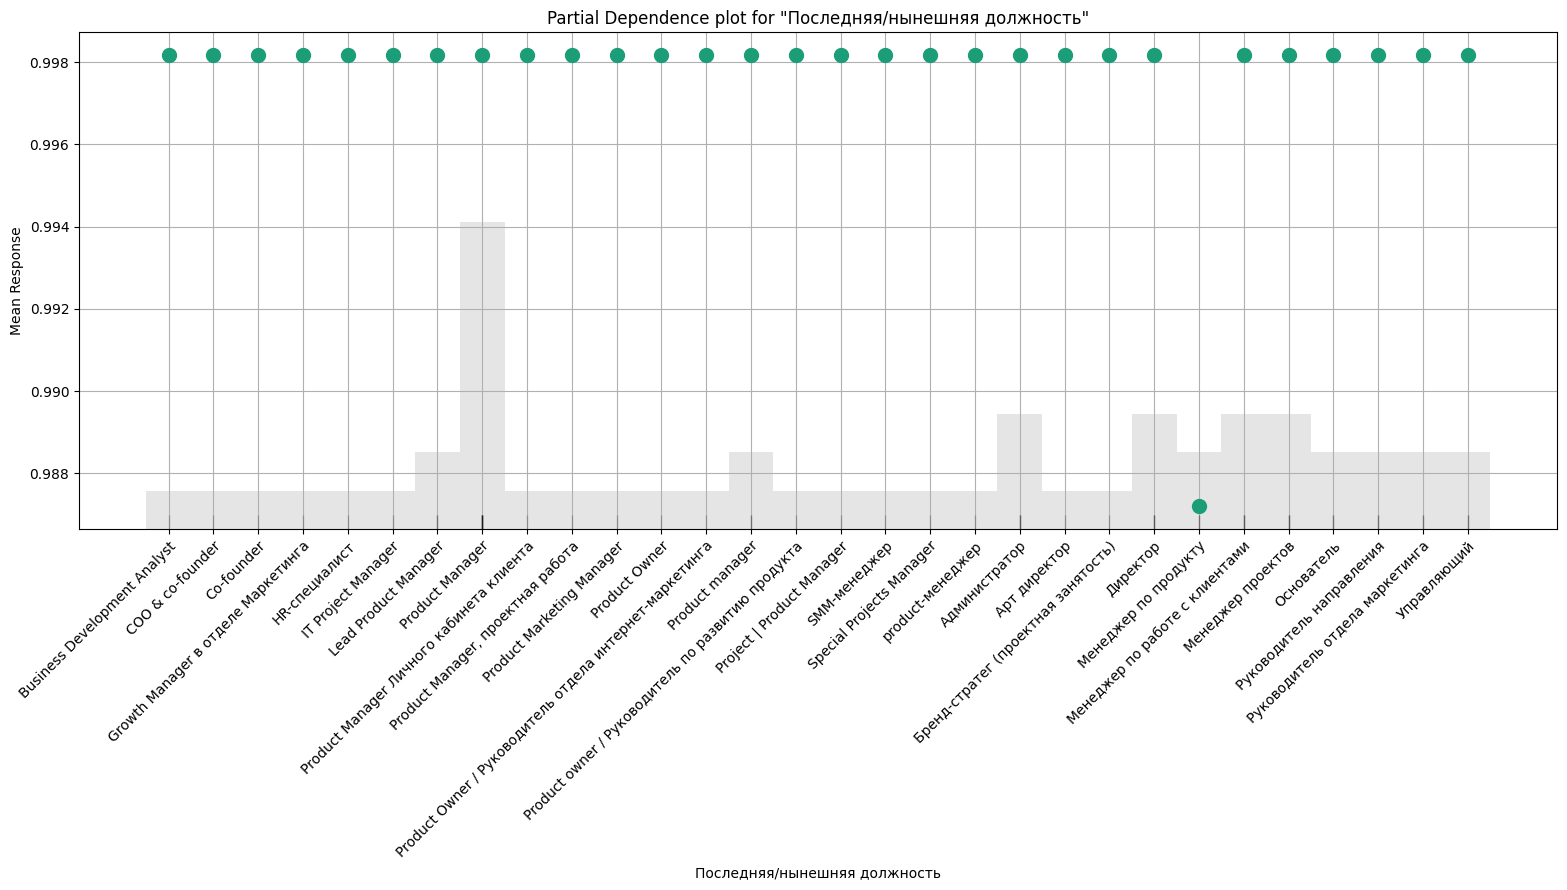

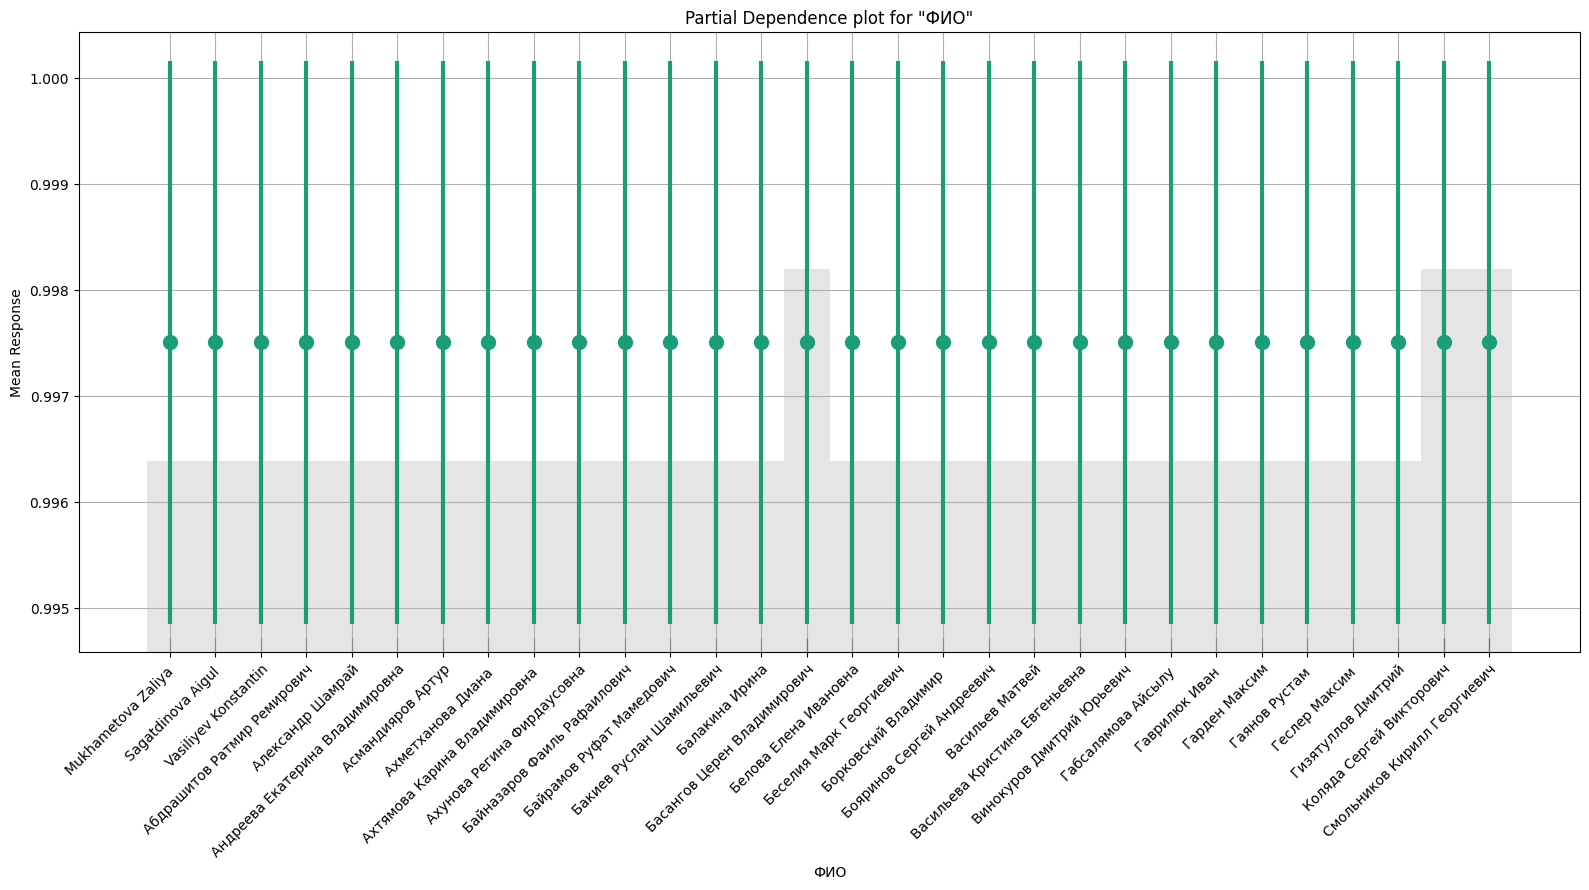

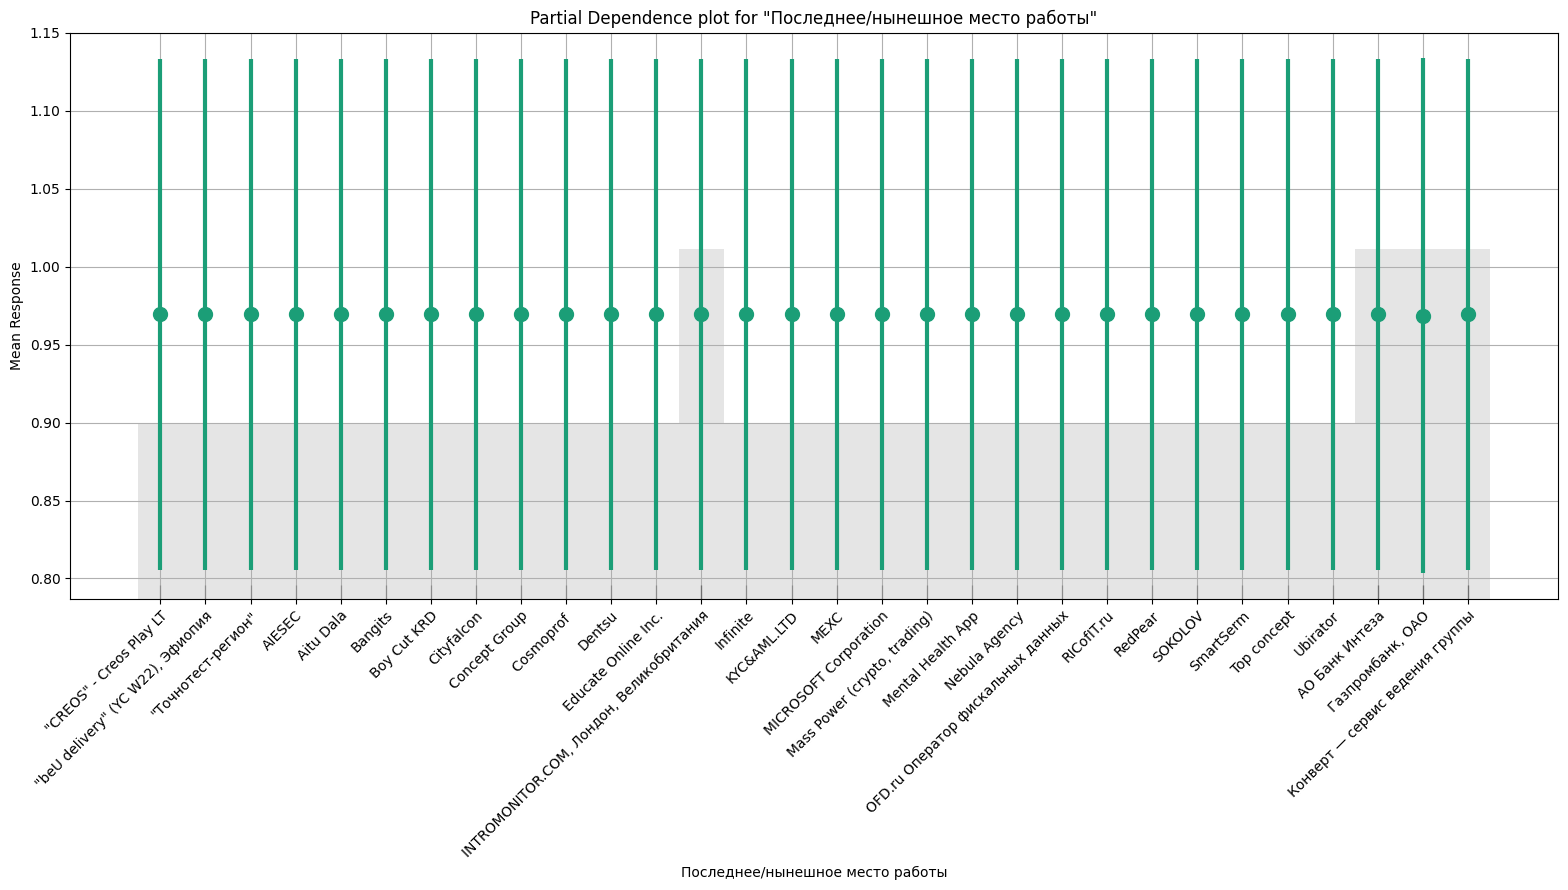

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_5_AutoML_2_20230612_72107

,да,нет,Error,Rate
да,1.0,1.0,0.5,(1.0/2.0)
нет,0.0,97.0,0.0,(0.0/97.0)
Total,1.0,98.0,0.0101,(1.0/99.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [43]:
type(aml_1)
best_model_1.explain(test)

In [23]:
perf = aml_1.leader.model_performance(test)
print(perf)

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 7.854902085973404e-06
RMSE: 0.0028026598234486833
LogLoss: 0.002142249167421536
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9871972522577899
       да    нет    Error    Rate
-----  ----  -----  -------  -----------
да     0     0      nan      (0.0/0.0)
нет    0     107    0        (0.0/107.0)
Total  0     107    0        (0.0/107.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value      idx
---------------------------  -----------  ---------  -----
max f1                       0.987197     1          2
max f2                       0.987197     1          2
max f0point5                 0.987197     1          2
max accuracy                 0.987197     1          2
max precision                0.998174     1          0
max recall                   0.987197     1          2
max specificity        

In [ ]:
preds = aml_1.predict(test)
print(preds)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
predict             да       нет
нет        2.40864e-08  1
нет        2.4076e-08   1
да         0.000821083  0.999179
нет        2.89798e-08  1
нет        2.4076e-08   1
нет        2.40864e-08  1
нет        2.40864e-08  1
нет        2.86322e-08  1
нет        2.40863e-08  1
нет        2.40864e-08  1
[118 rows x 3 columns]



Предварительно обработаем

In [ ]:
data = pd.read_excel (r'dataS.xlsx', index_col=0)
data = convertDataSet(data)
data.to_csv('data.csv')
data.head(5)

In [27]:
df = h2o.import_file("data.csv")
df = df[:,1:]

df.describe ()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:579
Cols:28

,Response_date,Full_name,Gender,Salary,Job,City,Experience,Last_place,Position,Education,Update_resume,Suitable,Birth,Age,DegreeOfStudy,YearOfGraduation,Employment_0,Employment_1,Employment_2,Employment_3,Employment_4,Employment_5,Employment_6,Schedule_0,Schedule_1,Schedule_2,Schedule_3,Schedule_4
type,int,enum,int,int,enum,enum,int,enum,enum,enum,int,enum,int,int,enum,int,int,int,int,int,int,int,int,int,int,int,int,int
mins,1686556325.0,,0.0,0.0,,,0.0,,,,1686556325.0,,1686556325.0,0.0,,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
mean,1686556326.5405872,,0.5215889464594128,43324.35578583765,,,119.17789291882556,,,,1686556326.5405872,,1686556326.5405872,28.454231433506045,,1955.245250431779,0.7132987910189983,1.0,1.0,0.3229706390328152,0.9671848013816926,0.9965457685664939,1.0,0.9723661485319517,0.542314335060449,0.9965457685664939,0.49568221070811747,0.9930915371329879
maxs,1686556328.0,,1.0,350000.0,,,446.0,,,,1686556328.0,,1686556328.0,60.0,,2026.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
sigma,0.9167757300215318,,0.49996563579013453,59109.15557008777,,,83.22247539027784,,,,0.9167757300215318,,0.9167757300215318,13.453594285246623,,340.4263893991987,0.45261179641181576,0.0,0.0,0.46801593017882204,0.1783066796778441,0.05872184648455243,0.0,0.16406312807564064,0.4986370676594125,0.05872184648455243,0.5004136792618045,0.08290118089211924
zeros,0,,277,288,,,7,,,,0,,0,76,,17,166,0,0,392,19,2,0,16,265,2,292,4
missing,0,0,0,0,0,0,0,0,0,0,0,79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1686556325.0,"[1, 1]",0.0,90000.0,"[4, 3, 2]","[1, 7, 6, 2, 5, 7, 6, 2, 4]",70.0,"[107, 108, 64, 28]","[4, 5, 32]","[3, 76, 1, 43, 2, 50, 71, 103, 6]",1686556325.0,да,1686556325.0,0.0,[2],2023.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
1,1686556325.0,"[1, 11, 50]",0.0,0.0,"[4, 3, 2]","[9, 6, 2, 5, 6, 2, 4]",143.0,"[4, 1]","[2, 10, 1, 1, 11, 1]","[3, 17, 1, 33, 16, 1, 1, 12, 6]",1686556325.0,да,1686556325.0,0.0,[2],2022.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
2,1686556325.0,"[1, 15, 39]",1.0,150000.0,"[4, 3, 2]","[11, 12, 3, 2, 5, 9, 3, 2, 4]",86.0,"[1, 35]","[7, 5, 47, 11, 52, 4]","[3, 27, 13, 41, 4, 2, 1, 146, 7, 118, 13, 26]",1686556325.0,да,1686556325.0,33.0,[2],2013.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0


In [28]:
train, test, valid = df.split_frame ( ratios = [ .7 , .15 ])

y = "Suitable"
x_train= train.columns
x_train.remove(y)


In [29]:
aml_2 = H2OAutoML(max_models = 10, seed = 1)
aml_2.train(x = x_train, y = y, training_frame = train)

AutoML progress: |
07:52:23.523: _train param, Dropping bad and constant columns: [Employment_6, Employment_5, Employment_2, Employment_1]
07:52:23.540: XGBoost_1_AutoML_3_20230612_75223 [XGBoost def_2] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for XGBoost model: XGBoost_1_AutoML_3_20230612_75223_cv_1.  Details: ERRR on field: _response_column: Response contains missing values (NAs) - not supported by XGBoost.

07:52:23.542: _train param, Dropping bad and constant columns: [Employment_6, Employment_5, Employment_2, Employment_1]

█████
07:52:29.261: _train param, Dropping bad and constant columns: [Employment_6, Employment_5, Employment_2, Employment_1]
07:52:30.410: _train param, Dropping bad and constant columns: [Employment_6, Employment_5, Employment_2, Employment_1]
07:52:30.423: XGBoost_2_AutoML_3_20230612_75223 [XGBoost def_1] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for XGBoost model: XGBoo

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_2_AutoML_3_20230612_75223_model_1


Status of Neuron Layers: predicting Suitable, 2-class classification, bernoulli distribution, CrossEntropy loss, 154,802 weights/biases, 1.8 MB, 16,032 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate              rate_rms               momentum    mean_weight             weight_rms           mean_bias                bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ---------------------  ---------------------  ----------  ----------------------  -------------------  -----------------------  --------------------
    1        1444     Input             15.0
    2        100      RectifierDropout  10.0       0.0   0.0   0.5766124059478797     0.4477200508117676     0.0         5.779090697255607e-05   0.03553342819213867  0.4575426753855259       0.10668057203292847
    3        100      RectifierDropout  10.0       0.0   0.0   0.014447070320651983   0.04113827645778656    0.0         0.00018530948454827012  0.1010371744632721   0.9989552170204484       0.024547360837459564
    4        2        Softmax                      0.0   0.0   0.0008760409218666609  0.0009447364136576653  0.0         -0.007644714887355804   0.5587334632873535   -1.4855196505073748e-06  0.021701544523239136

ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.0019556883093375245
RMSE: 0.044223164849855834
LogLoss: 0.011673676694229713
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7161136073993077
       да    нет    Error    Rate
-----  ----  -----  -------  -----------
да     8     0      0        (0.0/8.0)
нет    0     347    0        (0.0/347.0)
Total  8     347    0        (0.0/355.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.716114     1         329
max f2                       0.716114     1         329
max f0point5                 0.716114     1         329
max accuracy                 0.716114     1         329
max precision                1            1         0
max recall                   0.716114     1         329
max specificity              1            1         0
max absolute_mcc             0.716114     1         329
max min_per_class_accuracy   0.716114     1         329
max mean_per_class_accuracy  0.716114     1         329
max tns                      1            8         0
max fns                      1            342       0
max fps                      0.00428769   8         337
max tps                      0.716114     347       329
max tnr                      1            1         0
max fnr                      1            0.985591  0
max fpr                      0.00428769   1         337
max tpr                      0.716114     1         329

Gains/Lift Table: Avg response rate: 97.75 %, avg score: 97.36 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0056338                   1                  1.02305   1.02305            1                1         1                           1                   0.00576369      0.00576369                 2.30548   2.30548            0.00576369
2        0.0112676                   1                  1.02305   1.02305            1                1         1         

In [30]:
best_model_2 = aml_2.leader
lb = aml_2.leaderboard
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
DeepLearning_grid_2_AutoML_3_20230612_75223_model_1,0.904899,0.0848705,0.997444,0.4375,0.139771,0.019536
StackedEnsemble_BestOfFamily_1_AutoML_3_20230612_75223,0.887968,0.0781798,0.996873,0.4375,0.136917,0.0187463
StackedEnsemble_AllModels_1_AutoML_3_20230612_75223,0.887608,0.0816397,0.996904,0.4375,0.141142,0.0199212
DeepLearning_grid_2_AutoML_3_20230612_75223_model_2,0.849784,0.0884733,0.995881,0.4375,0.143008,0.0204513
DeepLearning_1_AutoML_3_20230612_75223,0.822046,0.0908029,0.992969,0.4375,0.144995,0.0210235
DeepLearning_grid_3_AutoML_3_20230612_75223_model_1,0.817003,0.099429,0.993733,0.5,0.14396,0.0207245
GLM_1_AutoML_3_20230612_75223,0.776297,0.0848693,0.992784,0.4375,0.136744,0.0186989
DeepLearning_grid_1_AutoML_3_20230612_75223_model_2,0.767291,0.110918,0.993261,0.5,0.151461,0.0229403
DeepLearning_grid_1_AutoML_3_20230612_75223_model_1,0.743876,0.161845,0.991415,0.4375,0.149147,0.0222449
DRF_1_AutoML_3_20230612_75223,0.633465,0.161057,0.98787,0.5,0.150102,0.0225306


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DeepLearning_grid_2_AutoML_3_20230612_75223_model_1

,да,нет,Error,Rate
да,0.0,1.0,1.0,(1.0/1.0)
нет,0.0,67.0,0.0,(0.0/67.0)
Total,0.0,68.0,0.0147,(1.0/68.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

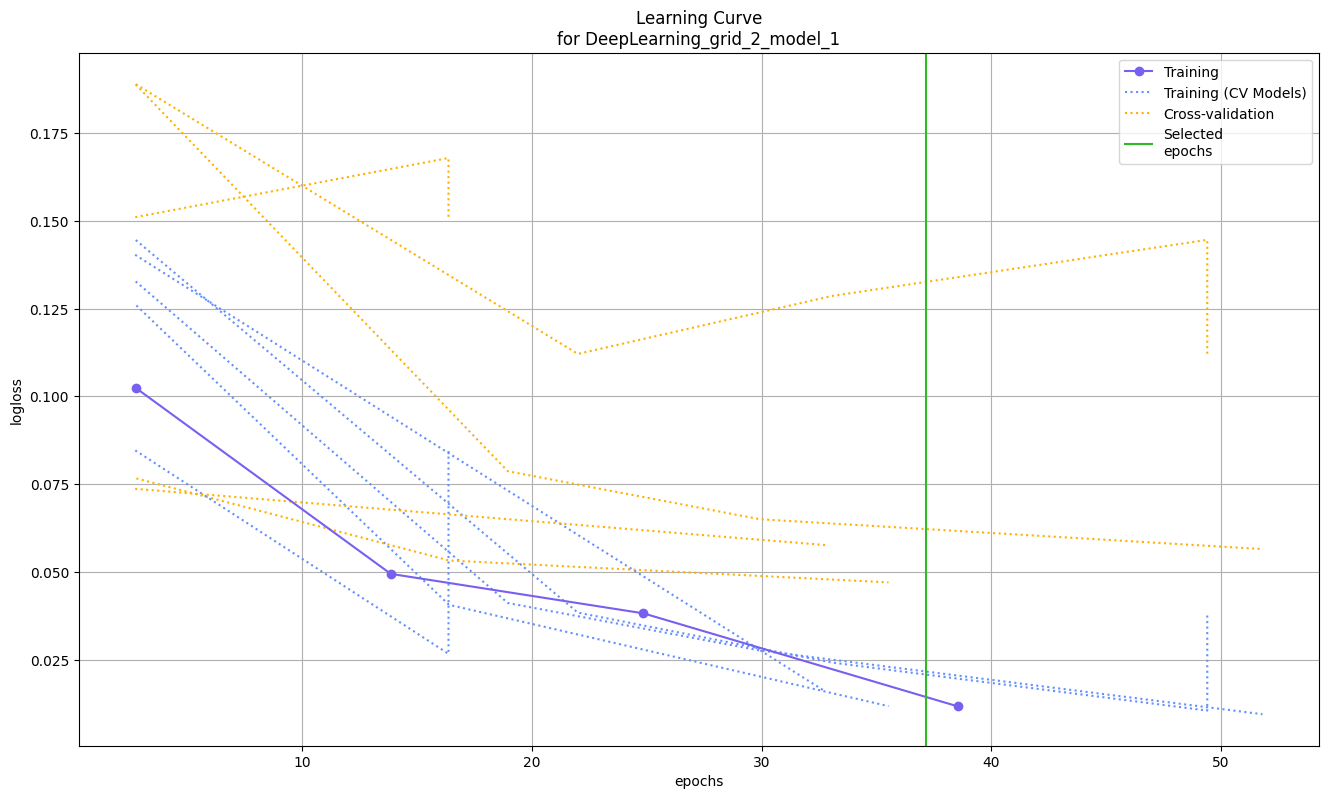

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

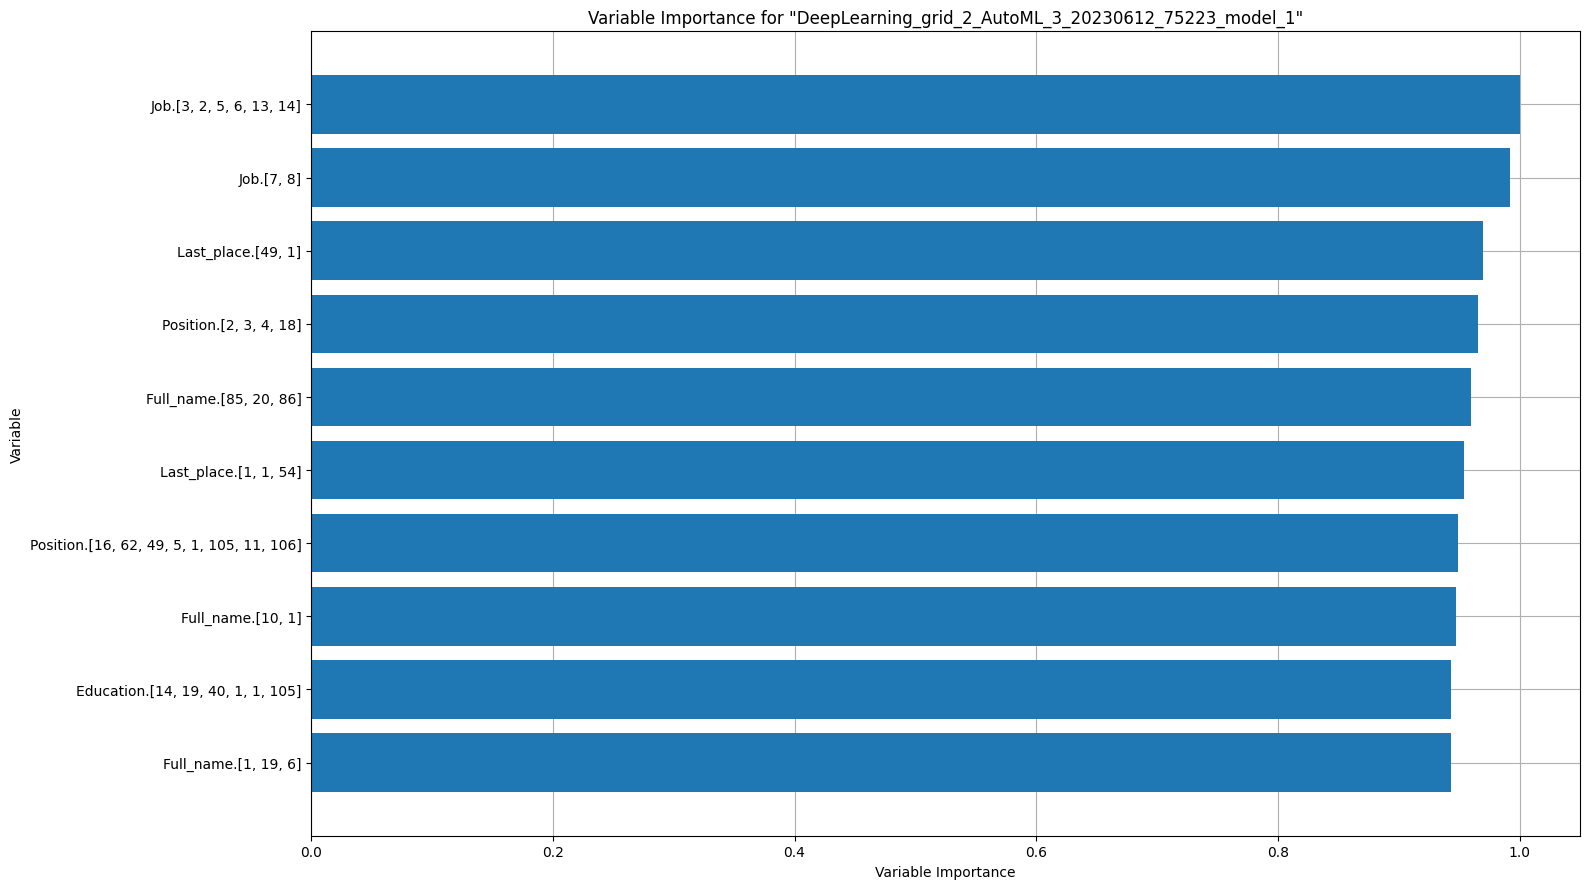

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

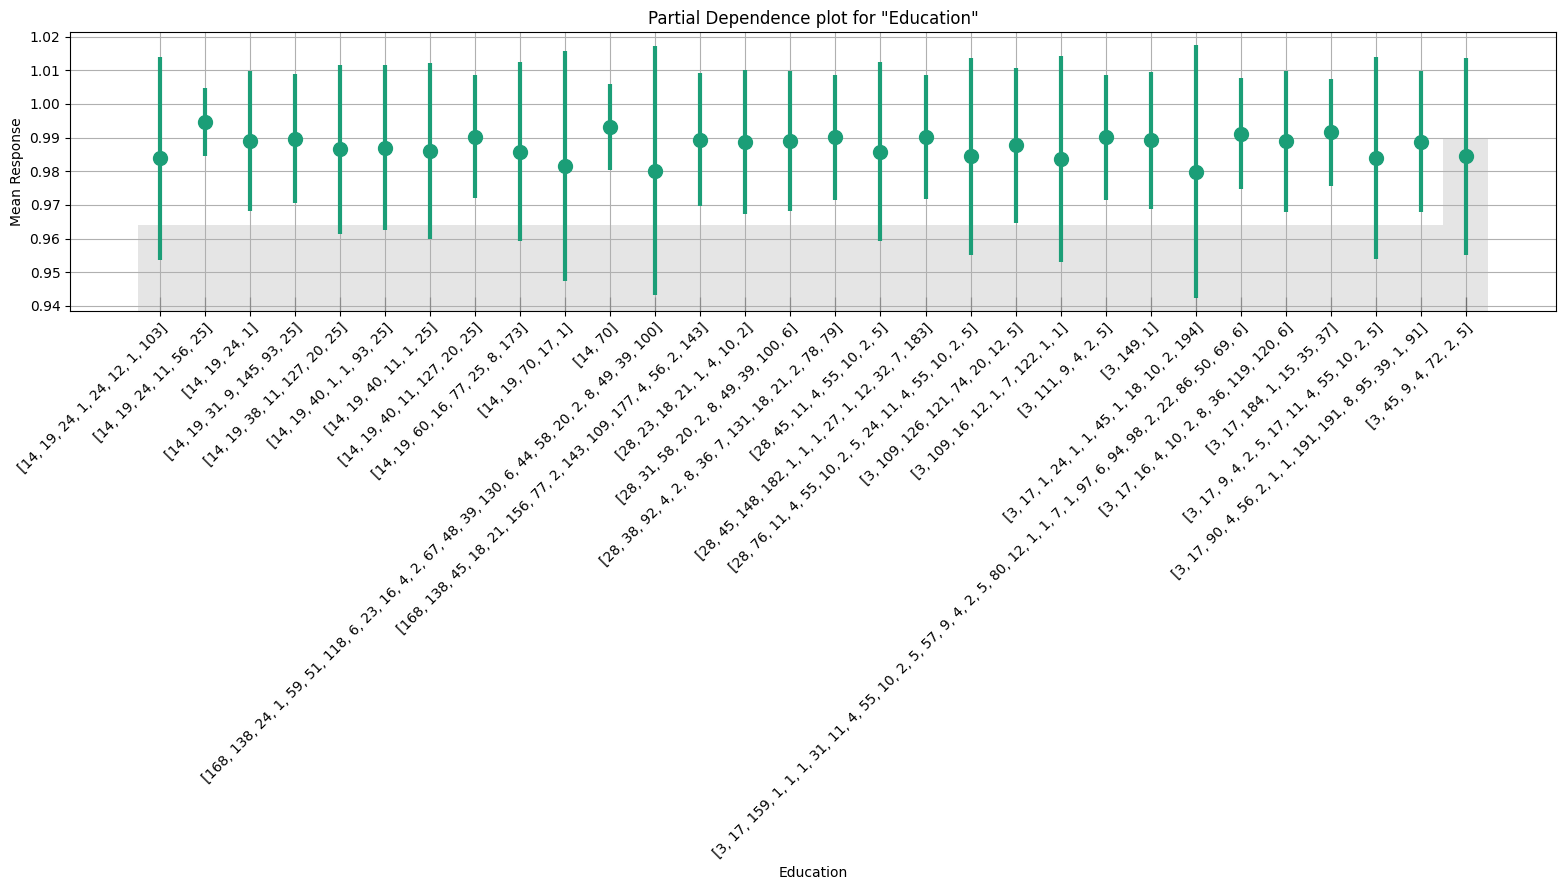

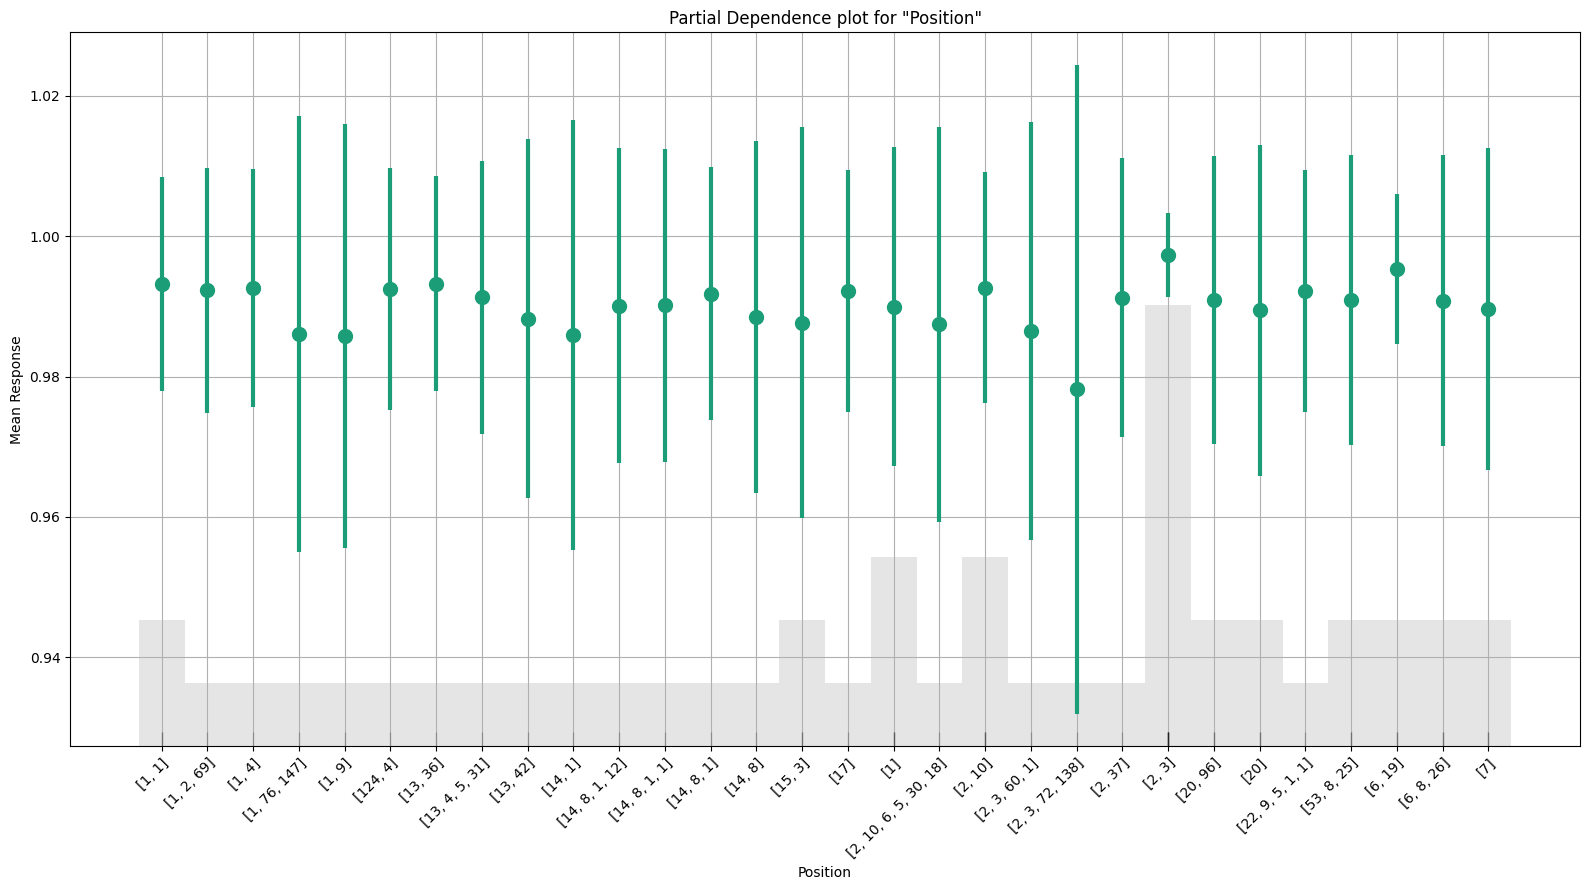

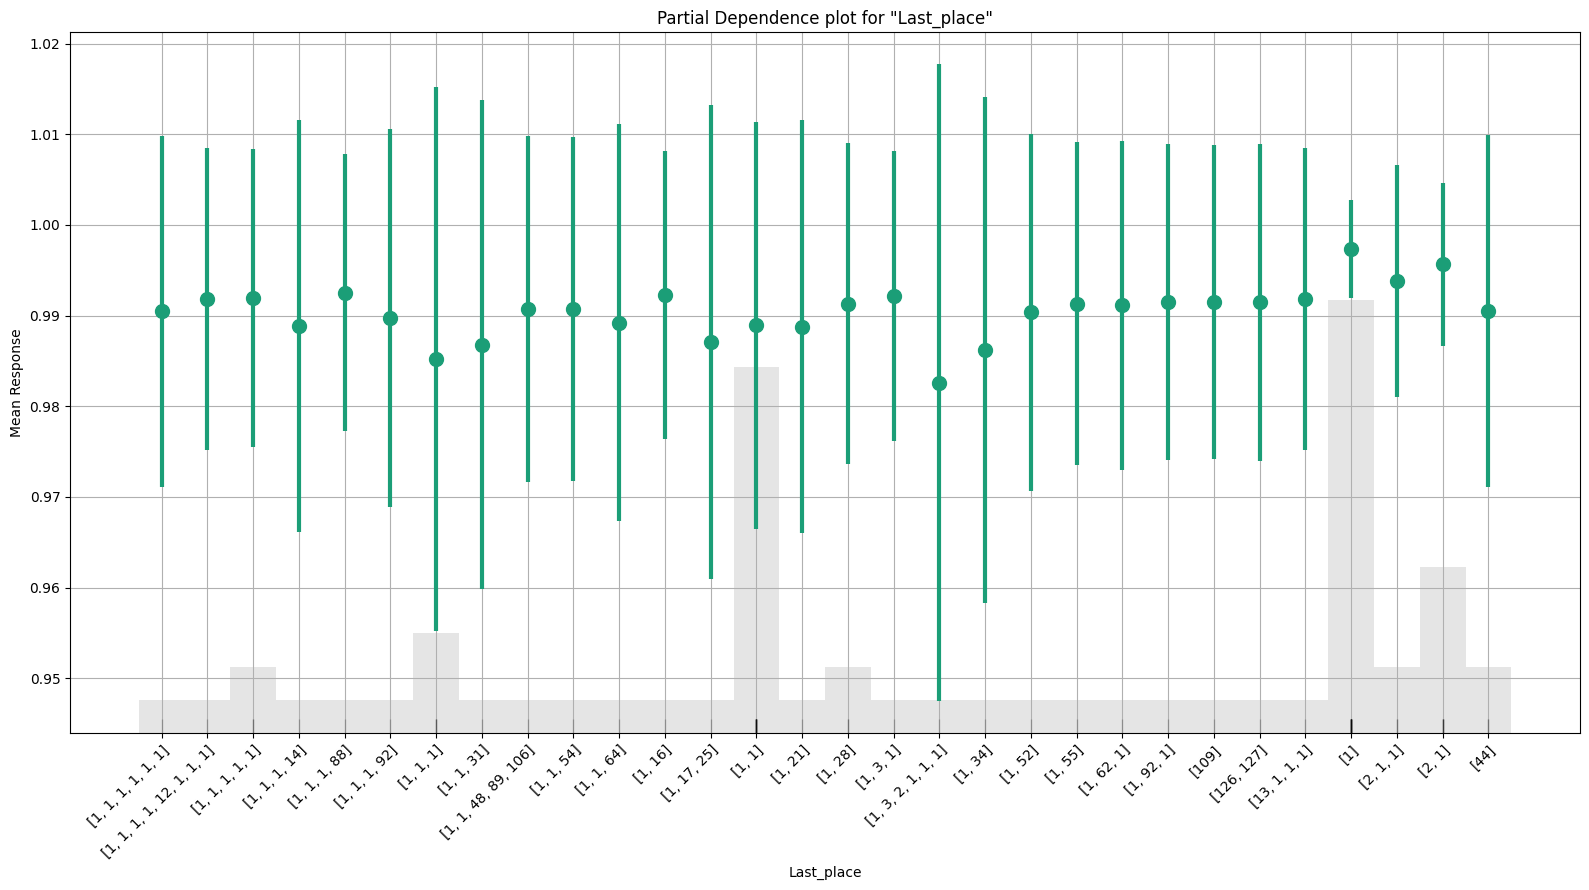

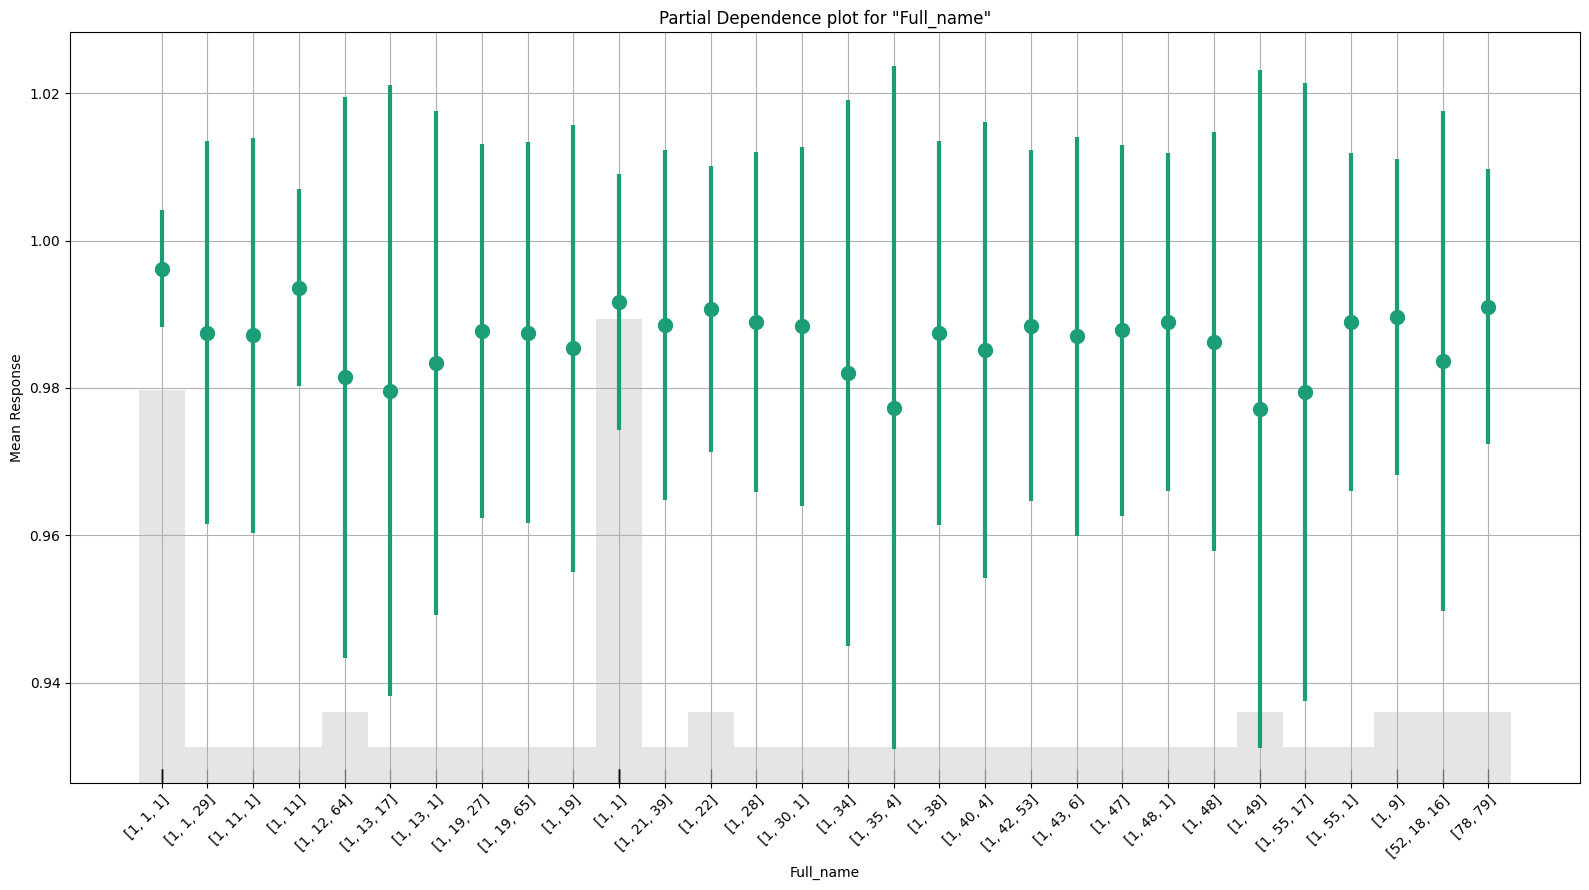

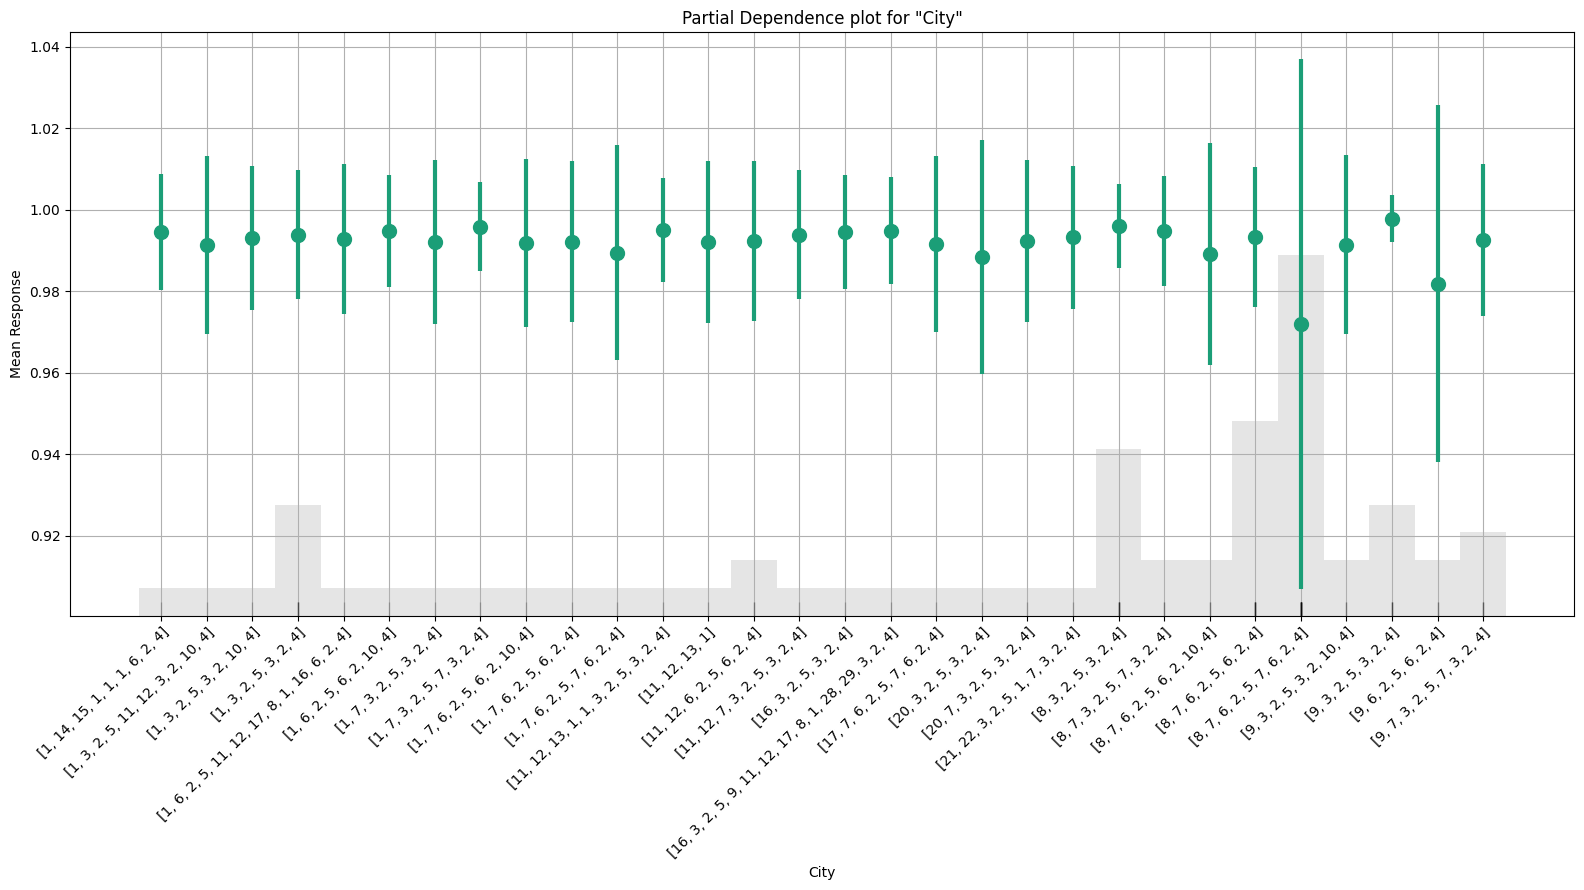

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DeepLearning_grid_2_AutoML_3_20230612_75223_model_1

,да,нет,Error,Rate
да,0.0,1.0,1.0,(1.0/1.0)
нет,0.0,67.0,0.0,(0.0/67.0)
Total,0.0,68.0,0.0147,(1.0/68.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [37]:
best_model_2.explain(test)

In [34]:
perf = aml_2.leader.model_performance(test)
print(perf)

ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.014213878703228502
RMSE: 0.11922197240118326
LogLoss: 0.05911836126046321
Mean Per-Class Error: 0.5
AUC: 0.8805970149253731
AUCPR: 0.9981318933887462
Gini: 0.7611940298507462

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.87562744654703
       да    нет    Error    Rate
-----  ----  -----  -------  ----------
да     0     1      1        (1.0/1.0)
нет    0     67     0        (0.0/67.0)
Total  0     68     0.0147   (1.0/68.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.875627     0.992593  67
max f2                       0.875627     0.997024  67
max f0point5                 0.875627     0.988201  67
max accuracy                 0.875627     0.985294  67
max precision                1            1         0
max recall                   0.87562

In [35]:
preds = aml_2.predict(test)
print(preds)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
predict             да       нет
нет        0.0375714    0.962429
нет        0.00856904   0.991431
нет        0.0472621    0.952738
нет        0.0646139    0.935386
нет        0.0302501    0.96975
нет        7.58049e-05  0.999924
нет        0.000457547  0.999542
нет        5.10271e-05  0.999949
нет        0.000259041  0.999741
нет        0.0446953    0.955305
[80 rows x 3 columns]



## **Autokeras**

In [ ]:
data = pd.read_excel (r'dataS.xlsx', index_col=0)
#Если необходимо переименовать
data.columns = ['Response_date', 'Full_name', 'Gender', 'Salary', 'Job', 'City', 'Employment', 'Schedule', 'Experience', 'Last_place', 'Position', 'Education', 'Update_resume', 'Suitable']
 
#Suitable
#Список ответов делаем
listAnswers = []
#Обработаем отдельно колонку с ответами
for i, row in data.iterrows():
   a = 1 if str(row.Suitable).find('да') != -1 else 0
   listAnswers.append([a])
answers = np.array(listAnswers)
print(answers.shape)

(579, 1)


In [ ]:
dataset = takeDataSet(data)
print(dataset.shape)
# Разбиение на тренировочную и тестовую выборки
from sklearn.model_selection import train_test_split

# Делаем выборки для обучения
x_train, x_test, y_train, y_test = train_test_split(dataset, # набор параметров
                                                    answers, # набор меток классов
                                                    test_size=0.2, # процент в тестовую
                                                    shuffle=True, #  перемешивание
                                                    random_state=3) # воспроизводимость
print(x_train.shape)

In [ ]:
model = ak.StructuredDataClassifier(overwrite=True,
                                 max_trials=10)
# Обучение сети 
history = model.fit(x_train, y_train, epochs=10, validation_data = (x_test, y_test),)

Trial 10 Complete [00h 00m 49s]
val_accuracy: 0.9913793206214905

Best val_accuracy So Far: 0.9913793206214905
Total elapsed time: 00h 08m 25s
Epoch 1/10
15/15 [==============================] - 6s 141ms/step - loss: 0.5099 - accuracy: 0.8920 - val_loss: 0.3178 - val_accuracy: 0.9914
Epoch 2/10
15/15 [==============================] - 0s 14ms/step - loss: 0.2488 - accuracy: 0.9784 - val_loss: 0.1601 - val_accuracy: 0.9914
Epoch 3/10
15/15 [==============================] - 0s 16ms/step - loss: 0.1435 - accuracy: 0.9784 - val_loss: 0.0972 - val_accuracy: 0.9914
Epoch 4/10
15/15 [==============================] - 0s 13ms/step - loss: 0.1061 - accuracy: 0.9784 - val_loss: 0.0789 - val_accuracy: 0.9914
Epoch 5/10
15/15 [==============================] - 0s 15ms/step - loss: 0.0906 - accuracy: 0.9784 - val_loss: 0.0738 - val_accuracy: 0.9914
Epoch 6/10
15/15 [==============================] - 0s 17ms/step - loss: 0.0805 - accuracy: 0.9784 - val_loss: 0.0721 - val_accuracy: 0.9914
Epoch 7/10

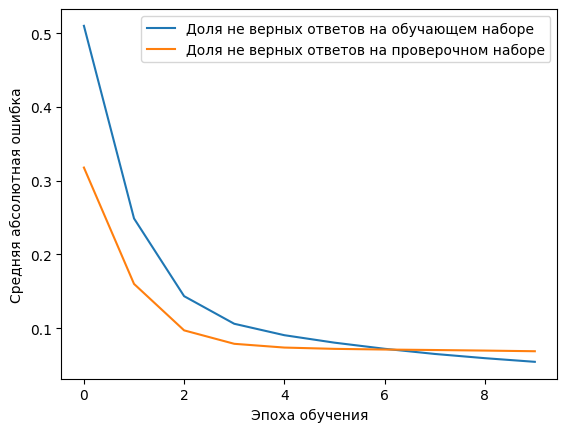

In [ ]:

# Визуализация точности на обучающей выборке
plt.plot(history.history['loss'], 
         label='Среднеквадратическая ошибка на обучающем наборе') #mae accuracy
plt.plot(history.history['val_loss'], 
        label='Среднеквадратическая ошибка на проверочном наборе') #val_mae val_accuracy
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

In [ ]:
eval = model.evaluate(x_test, y_test)
print(eval)

4/4 [==============================] - 3s 13ms/step - loss: 0.0689 - accuracy: 0.9914
[0.06886612623929977, 0.9913793206214905]


In [ ]:

# Проверка работы сети - предсказание на тренировочной выборке
pred = model.predict(x_train)

# Расчет среднего значения ошибки 
print(mean_absolute_error(pred, y_train))  

15/15 [==============================] - 0s 17ms/step
0.02159827213822894
